In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [2]:
import h5py
import pickle
import numpy as np
import torch
import torch_interpolations as torchitp
# from torchquad import Simpson, set_up_backend
from scipy.linalg import toeplitz
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import quad,simpson
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import ricciardi as ric
import dmft

def imshowbar(fig,ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')
    
def ytitle(ax,text,xloc=-0.25,**kwargs):
    ax.text(xloc,0.5,text,horizontalalignment='left',verticalalignment='center',
        rotation='vertical',transform=ax.transAxes,**kwargs)

# Get Best Monkey Fit on Ring

In [3]:
id = (133, 0)
with open('./../results/results_ring_'+str(id[0])+'.pkl', 'rb') as handle:
    res_dict = pickle.load(handle)[id[1]]
    prms = res_dict['prms']
    eX = res_dict['best_monk_eX']
    bX = res_dict['best_monk_bX']
    aXs = res_dict['best_monk_aXs']
    K = prms['K']
    SoriE = prms['SoriE']
    SoriI = prms['SoriI']
    SoriF = prms['SoriF']
    J = prms['J']
    beta = prms['beta']
    gE = prms['gE']
    gI = prms['gI']
    hE = prms['hE']
    hI = prms['hI']
    L = prms['L']
    CVL = prms['CVL']
    
ri = ric.Ricciardi()

# Try to run dmft script

In [4]:
reload(dmft)

Twrm = 0.75
Tsav = 0.25
dt = 0.01/4

res_dict = dmft.run_two_stage_ring_dmft(prms,bX,aXs[-1]/bX,eX,'./../results',ri,Twrm,Tsav,dt)

/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:436: RuntimeWarning: invalid value encountered in divide
  sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))


0.20% completed


/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:501: RuntimeWarning: invalid value encountered in divide
  sCr2ij = 0.5*sa2/np.log(np.fmax(np.abs((Crpij-Crbij)/(Craij-Crbij)),1+1e-4))


0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 7.9517690000000005 s


/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:1173: RuntimeWarning: divide by zero encountered in divide
  srdivsWr = np.sqrt(sr2/doub_mat(sW2))
/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:1180: RuntimeWarning: invalid value encountered in multiply
  mua = ((1-srdivsWr*np.exp(-0.5*sa2/sWr2))*doub_muW+sr/sr2pi*doub_muWb)@rb +\
/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:1181: RuntimeWarning: invalid value encountered in multiply
  (srdivsWr*np.exp(-0.5*sa2/sWr2)*doub_muW)@rp + doub_vec(muHa)
/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:1182: RuntimeWarning: invalid value encountered in multiply
  mup = ((1-srdivsWr)*doub_muW+sr/sr2pi*doub_muWb)@rb + (srdivsWr*doub_muW)@rp + doub_vec(muHp)


0.05% completed
0.10% completed
0.15% completed
0.20% completed
0.25% completed
0.30% completed
0.35% completed


/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:683: RuntimeWarning: invalid value encountered in divide
  sCdr2ij = 0.5*sa2/np.log(np.fmax(np.abs((Cdrpij-Cdrbij)/(Cdraij-Cdrbij)),1+1e-4))


0.40% completed
0.45% completed
0.50% completed
0.55% completed
0.60% completed
0.65% completed
0.70% completed
0.75% completed
0.80% completed
0.85% completed
0.90% completed
0.95% completed
1.00% completed
integrating first stage took 62.045128000000005 s


In [5]:
print(res_dict['rb'])
print(res_dict['ra'])
print(res_dict['rp'])
print(dmft.grid_stat(np.mean,res_dict['Crb'],1,dt))
print(dmft.grid_stat(np.mean,res_dict['Cra'],1,dt))
print(dmft.grid_stat(np.mean,res_dict['Crp'],1,dt))
print(res_dict['sr'])
print(dmft.grid_stat(np.mean,res_dict['sCr'],1,dt))
print(res_dict['convb'])
print(res_dict['conva'])
print(res_dict['convp'])

[15.157766 15.399036 17.197659 17.410238]
[57.075138 49.42568  58.991688 51.043156]
[78.10387  55.969456 79.69268  57.557167]
[ 411.11383932  913.65857161  801.40417224 1214.26460131]
[5332.92736502 7827.54537841 5871.6518768  8292.9275698 ]
[8663.3703023  9350.13461601 9232.28268412 9838.46449955]
[16.634283 25.290012 16.721806 25.208082]
[14.75393208 23.77328019 14.87383913 23.86633262]
[False False False False]
[False False False False]
[False False False False]


In [19]:
print(res_dict['drb'])
print(res_dict['dra'])
print(res_dict['drp'])
print(dmft.grid_stat(np.mean,res_dict['Cdrb'][:,:],1,dt))
print(dmft.grid_stat(np.mean,res_dict['Cdra'][:,:],1,dt))
print(dmft.grid_stat(np.mean,res_dict['Cdrp'][:,:],1,dt))
print(dmft.grid_stat(np.mean,res_dict['sCdr'][:,:],1,dt))
print(res_dict['convdb'])
print(res_dict['convda'])
print(res_dict['convdp'])

[-2.0405827 -2.0139275]
[-1.918045  -1.6181068]
[-1.5927048 -1.5889626]
[373.13646655 407.32434429]
[ 602.61230698 1136.68112303]
[ 645.72665153 1235.54744472]
[25.34229558 29.59129898]
[ True  True]
[ True  True]
[ True  True]


In [20]:
reload(dmft)

Twrm = 0.75
Tsav = 0.25
dt = 0.01/4

dmft.run_first_stage_doub_ring_dmft(prms,bX,aXs[-1]/bX,eX,'./../results',ri,Twrm,Tsav,dt)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 114.98046599999952 s


{'rb': array([15.133091, 15.398537, 17.173674, 17.412464], dtype=float32),
 'ra': array([57.029774, 49.412296, 58.94782 , 51.030403], dtype=float32),
 'rp': array([78.02709 , 55.947884, 79.6198  , 57.536846], dtype=float32),
 'sr': array([16.641127, 25.300146, 16.72819 , 25.216362], dtype=float32),
 'Crb': array([[ 447.3193 ,  447.24   ,  447.00302,  446.6108 ,  446.06766,
          445.37946,  444.55334,  443.59775,  442.52234,  441.33737,
          440.05402,  438.6837 ,  437.23795,  435.72852,  434.16705,
          432.56476,  430.93256,  429.28073,  427.61905,  425.9564 ,
          424.30112,  422.66068,  421.04172,  419.45023,  417.89145,
          416.36975,  414.88895,  413.4522 ,  412.06186,  410.71988,
          409.4277 ,  408.1862 ,  406.99582,  405.85672,  404.76865,
          403.73132,  402.74377,  401.80505,  400.91403,  400.0694 ,
          399.2699 ,  398.51385,  397.79974,  397.12598,  396.49075,
          395.89264,  395.3299 ,  394.8008 ,  394.30383,  393.8374 ,
   

In [22]:
reload(dmft)

Twrm = 0.75
Tsav = 0.25
dt = 0.01/4

dmft.run_first_stage_dmft(prms,bX,eX,'./../results',ri,Twrm,Tsav,dt)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 35.98065200000019 s


{'r': array([15.133091, 15.398537, 17.173674, 17.412464], dtype=float32),
 'Cr': array([[ 447.3193 ,  447.24   ,  447.00302,  446.6108 ,  446.06766,
          445.37946,  444.55334,  443.59775,  442.52234,  441.33737,
          440.05402,  438.6837 ,  437.23795,  435.72852,  434.16705,
          432.56476,  430.93256,  429.28073,  427.61905,  425.9564 ,
          424.30112,  422.66068,  421.04172,  419.45023,  417.89145,
          416.36975,  414.88895,  413.4522 ,  412.06186,  410.71988,
          409.4277 ,  408.1862 ,  406.99582,  405.85672,  404.76865,
          403.73132,  402.74377,  401.80505,  400.91403,  400.0694 ,
          399.2699 ,  398.51385,  397.79974,  397.12598,  396.49075,
          395.89264,  395.3299 ,  394.8008 ,  394.30383,  393.8374 ,
          393.39987,  392.9897 ,  392.60538,  392.24557,  391.90894,
          391.594  ,  391.29962,  391.0246 ,  390.7678 ,  390.52805,
          390.30435,  390.0957 ,  389.90125,  389.72006,  389.5512 ,
          389.3938 ,  3

In [6]:
K_prms = prms.copy()
K_prms['K'] = np.round(500*10**np.arange(-1.4,0.4+0.1,0.2)).astype(np.int32)[7]
K_prms['J'] = prms['J'] / np.sqrt(K_prms['K']/500)

reload(dmft)

Twrm = 0.75
Tsav = 0.25
dt = 0.01/4

res_dict =\
    dmft.run_first_stage_dmft(K_prms,bX*10**np.arange(-1.4,0.4+0.1,0.2)[7],eX,'./../results',ri,Twrm,Tsav,dt,
                              which='base',return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 30.05205099999999 s


In [7]:
tau = np.array([ri.tE,ri.tI],dtype=np.float32)
W = K_prms['J']*np.array([[1,-K_prms['gE']],[1./K_prms['beta'],-K_prms['gI']/K_prms['beta']]],dtype=np.float32)
Ks = np.array([K_prms['K'],K_prms['K']/4],dtype=np.float32)
Hb = bX*K_prms['K']*K_prms['J']*np.array([K_prms['hE'],K_prms['hI']/K_prms['beta']],dtype=np.float32)
Hp = bX*(1+0)*K_prms['K']*K_prms['J']*np.array([K_prms['hE'],K_prms['hI']/K_prms['beta']],dtype=np.float32)
eH = eX
sW = np.array([[K_prms['SoriE'],K_prms['SoriI']],[K_prms['SoriE'],K_prms['SoriI']]],dtype=np.float32)
sH = np.array([K_prms['SoriF'],K_prms['SoriF']],dtype=np.float32)

muW = tau[:,None]*W*Ks
SigW = tau[:,None]**2*W**2*Ks

sW2 = sW**2
sH2 = sH**2

muHb = tau*Hb
muHp = tau*Hp
smuH2 = sH2
SigHb = (muHb*eH)**2
SigHp = (muHp*eH)**2
sSigH2 = sH2

rb = res_dict['r'][:2]
rp = res_dict['r'][:2]
sr2 = 1e4*np.ones(2)
Crb = dmft.grid_stat(np.mean,res_dict['Cr'][:2],4,dt)
Crp = dmft.grid_stat(np.mean,res_dict['Cr'][:2],4,dt)
sCr2 = 1e4*np.ones(2)
        
sWr2 = sW2+sr2
sWCr2 = sW2+sCr2

mub = muW*rb
mup = mub + np.sqrt(sr2/sWr2)*muW*(rp-rb)
smu2 = sWr2

Sigb = SigW*Crb
Sigp = Sigb + np.sqrt(sCr2/sWCr2)*SigW*(Crp-Crb)
sSig2 = sWCr2

In [62]:
mub

array([[ 0.02149209, -0.03820914],
       [ 0.06013562, -0.07296335]], dtype=float32)

In [69]:
print(mub[0,0] + muHb[0])
print(mub[0,1])

0.047362268
-0.038209137


In [70]:
print((mub[0,0] + muHb[0])/np.sqrt(Sigb[0,0] + SigHb[0]))
print((mub[0,1])/np.sqrt(Sigb[0,1]))

26.2952534788303
-6.0482737987282995


In [71]:
def calc_bal(μmuE,μmuI,ΣmuE,ΣmuI,N=10000):
    muEs = np.fmax(μmuE + np.sqrt(ΣmuE)*np.random.randn(N),1e-12)
    muIs = np.fmin(μmuI + np.sqrt(ΣmuI)*np.random.randn(N),-1e-12)
    return np.mean(np.abs(muEs+muIs)/muEs)

In [72]:
calc_bal(mub[0,0] + muHb[0],mub[0,1],Sigb[0,0] + SigHb[0],Sigb[0,1])

0.20111095521671807

In [179]:
this_prms = prms.copy()

reload(dmft)

Twrm = 0.75
Tsav = 0.25
dt = 0.01/5

res_dict =\
    dmft.run_first_stage_dmft(this_prms,bX+aXs[-1],eX,'./../results',ri,Twrm,Tsav,dt,
                              which='both',return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 54.86114100000009 s


In [154]:
0.8*res_dict['r'][0]+0.2*res_dict['r'][1]

56.728569793701176

In [193]:
this_prms = prms.copy()
this_prms['basefrac'] = 1-1/8

reload(dmft)

Twrm = 0.6
Tsav = 0.2
dt = 0.01/4

res_dict =\
    dmft.run_two_stage_ring_dmft(this_prms,bX,aXs[-1]/bX,eX,'./../results',ri,Twrm,Tsav,dt,
                              return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 72.85788400000001 s
0.05% completed
0.10% completed
0.15% completed
0.20% completed
0.25% completed
0.30% completed
0.35% completed


/Users/tuannguyen/ToroidalNetworks/sparse_weights/notebooks/./../scripts/dmft.py:700: RuntimeWarning: invalid value encountered in divide
  sCdr2ij = np.fmax(1e-1,0.5*sa2/np.log(np.fmax(np.abs((Cdrpij-Cdrbij)/(Cdraij-Cdrbij)),1+1e-4)))


0.40% completed
0.45% completed
0.50% completed
0.55% completed
0.60% completed
0.65% completed
0.70% completed
0.75% completed
0.80% completed
0.85% completed
0.90% completed
0.95% completed
1.00% completed
integrating second stage took 750.8021089999997 s


In [232]:
reload(dmft)

FE,FI,ME,MI,CE,CI = dmft.base_itp_moments('./../results')
FL,ML,CL = dmft.opto_itp_moments('./../results',L,CVL)

dmft.R_simp(ME,ML,res_dict['mub'][0],res_dict['mub'][2],
            res_dict['Sigb'][0,0],res_dict['Sigb'][2,0],
            0.5*(res_dict['Sigb'][0,0]+res_dict['Sigb'][2,0]-res_dict['Sigdb'][0,0]))

1.0


1304.3655591372724

In [234]:
res_dict['Sigdb'][0,0]

-8.759684e-06

In [240]:
SigW@res_dict['full_Cdrb'][:,0,0]

array([5.5972359e-06, 2.2323322e-05], dtype=float32)

In [231]:
0.5*(res_dict['Sigb'][0,0]+res_dict['Sigb'][2,0]-res_dict['Sigdb'][0,0])

0.001423415495082736

In [233]:
np.sqrt(res_dict['Sigb'][0,0]*res_dict['Sigb'][2,0])

0.0014189001

In [229]:

dmft.R_simp(ME,ML,res_dict['mub'][0],res_dict['mub'][2],
            res_dict['Sigb'][0,0],res_dict['Sigb'][2,0],
            +10)

1304.3656743417696

In [216]:
ME(res_dict['mub'][0],res_dict['Sigb'][0,0])*ML(res_dict['mub'][2],res_dict['Sigb'][2,0])

array([172.55834544])

In [210]:
1304.3655591372724

0.0013994228

In [217]:
0.5*(res_dict['Sigb'][0,0]+res_dict['Sigb'][2,0]-res_dict['Sigdb'][0,0])

0.001423415495082736

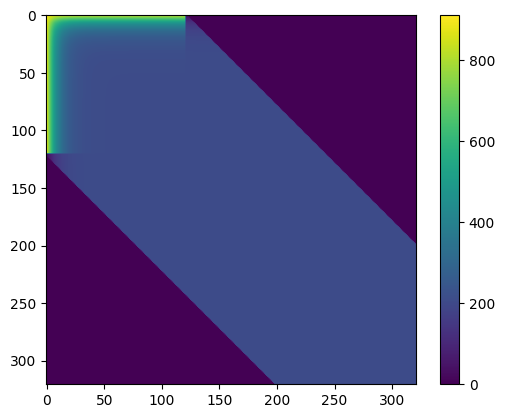

In [226]:
plt.imshow(res_dict['full_Cdrp'][0])
plt.colorbar()

In [196]:
first_res_dict =\
    dmft.run_first_stage_ring_dmft(this_prms,bX,aXs[-1]/bX,eX,'./../results',ri,Twrm,Tsav,dt,
                              return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 76.92740999999978 s


In [197]:
first_res_dict['rp']

array([63.3122  , 57.208008, 65.194466, 58.864548], dtype=float32)

In [194]:
rvb = res_dict['rb'][:2]
rvp = res_dict['rp'][:2]
srv2 = res_dict['sr'][:2]**2
rob = res_dict['rb'][2:]
rop = res_dict['rp'][2:]
sro2 = res_dict['sr'][2:]**2
Crvb = dmft.grid_stat(np.mean,res_dict['Crb'][:2],4,dt)
Crvp = dmft.grid_stat(np.mean,res_dict['Crp'][:2],4,dt)
sCrv2 = dmft.grid_stat(np.mean,res_dict['sCr'][:2],4,dt)**2
Crob = dmft.grid_stat(np.mean,res_dict['Crb'][2:],4,dt)
Crop = dmft.grid_stat(np.mean,res_dict['Crp'][2:],4,dt)
sCro2 = dmft.grid_stat(np.mean,res_dict['sCr'][2:],4,dt)**2

oris = np.arange(20)*180/20
oris[oris > 90] = 180 - oris[oris > 90]

def gauss(x,b,p,s2):
    return b + (p-b)*np.exp(-0.5*x**2/s2)

gauss(oris,rvb[0],rvp[0],srv2[0])

array([170.44612122, 169.33908898, 166.54181523, 163.23441084,
       160.46770837, 158.67756493, 157.750223  , 157.35902397,
       157.22333646, 157.18440882, 157.17513483, 157.18440882,
       157.22333646, 157.35902397, 157.750223  , 158.67756493,
       160.46770837, 163.23441084, 166.54181523, 169.33908898])

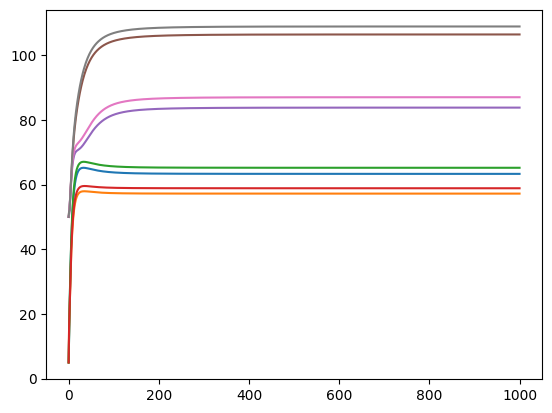

In [181]:
plt.plot(res_dict['full_rp'].T)
plt.plot(np.sign(dmft.each_diag(res_dict['full_Crp'])).T*\
         np.sqrt(np.abs(dmft.each_diag(res_dict['full_Crp']))).T)

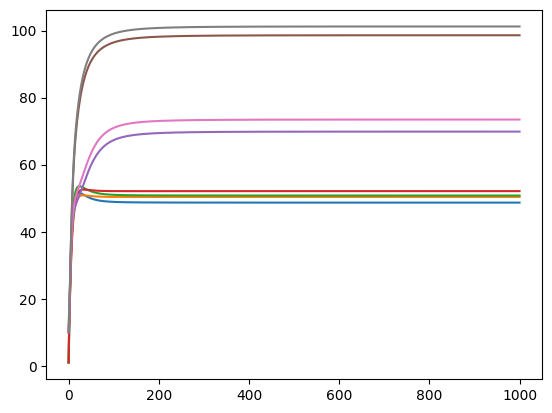

In [182]:
plt.plot(res_dict['full_rb'].T)
plt.plot(np.sign(dmft.each_diag(res_dict['full_Crb'])).T*\
         np.sqrt(np.abs(dmft.each_diag(res_dict['full_Crb']))).T)

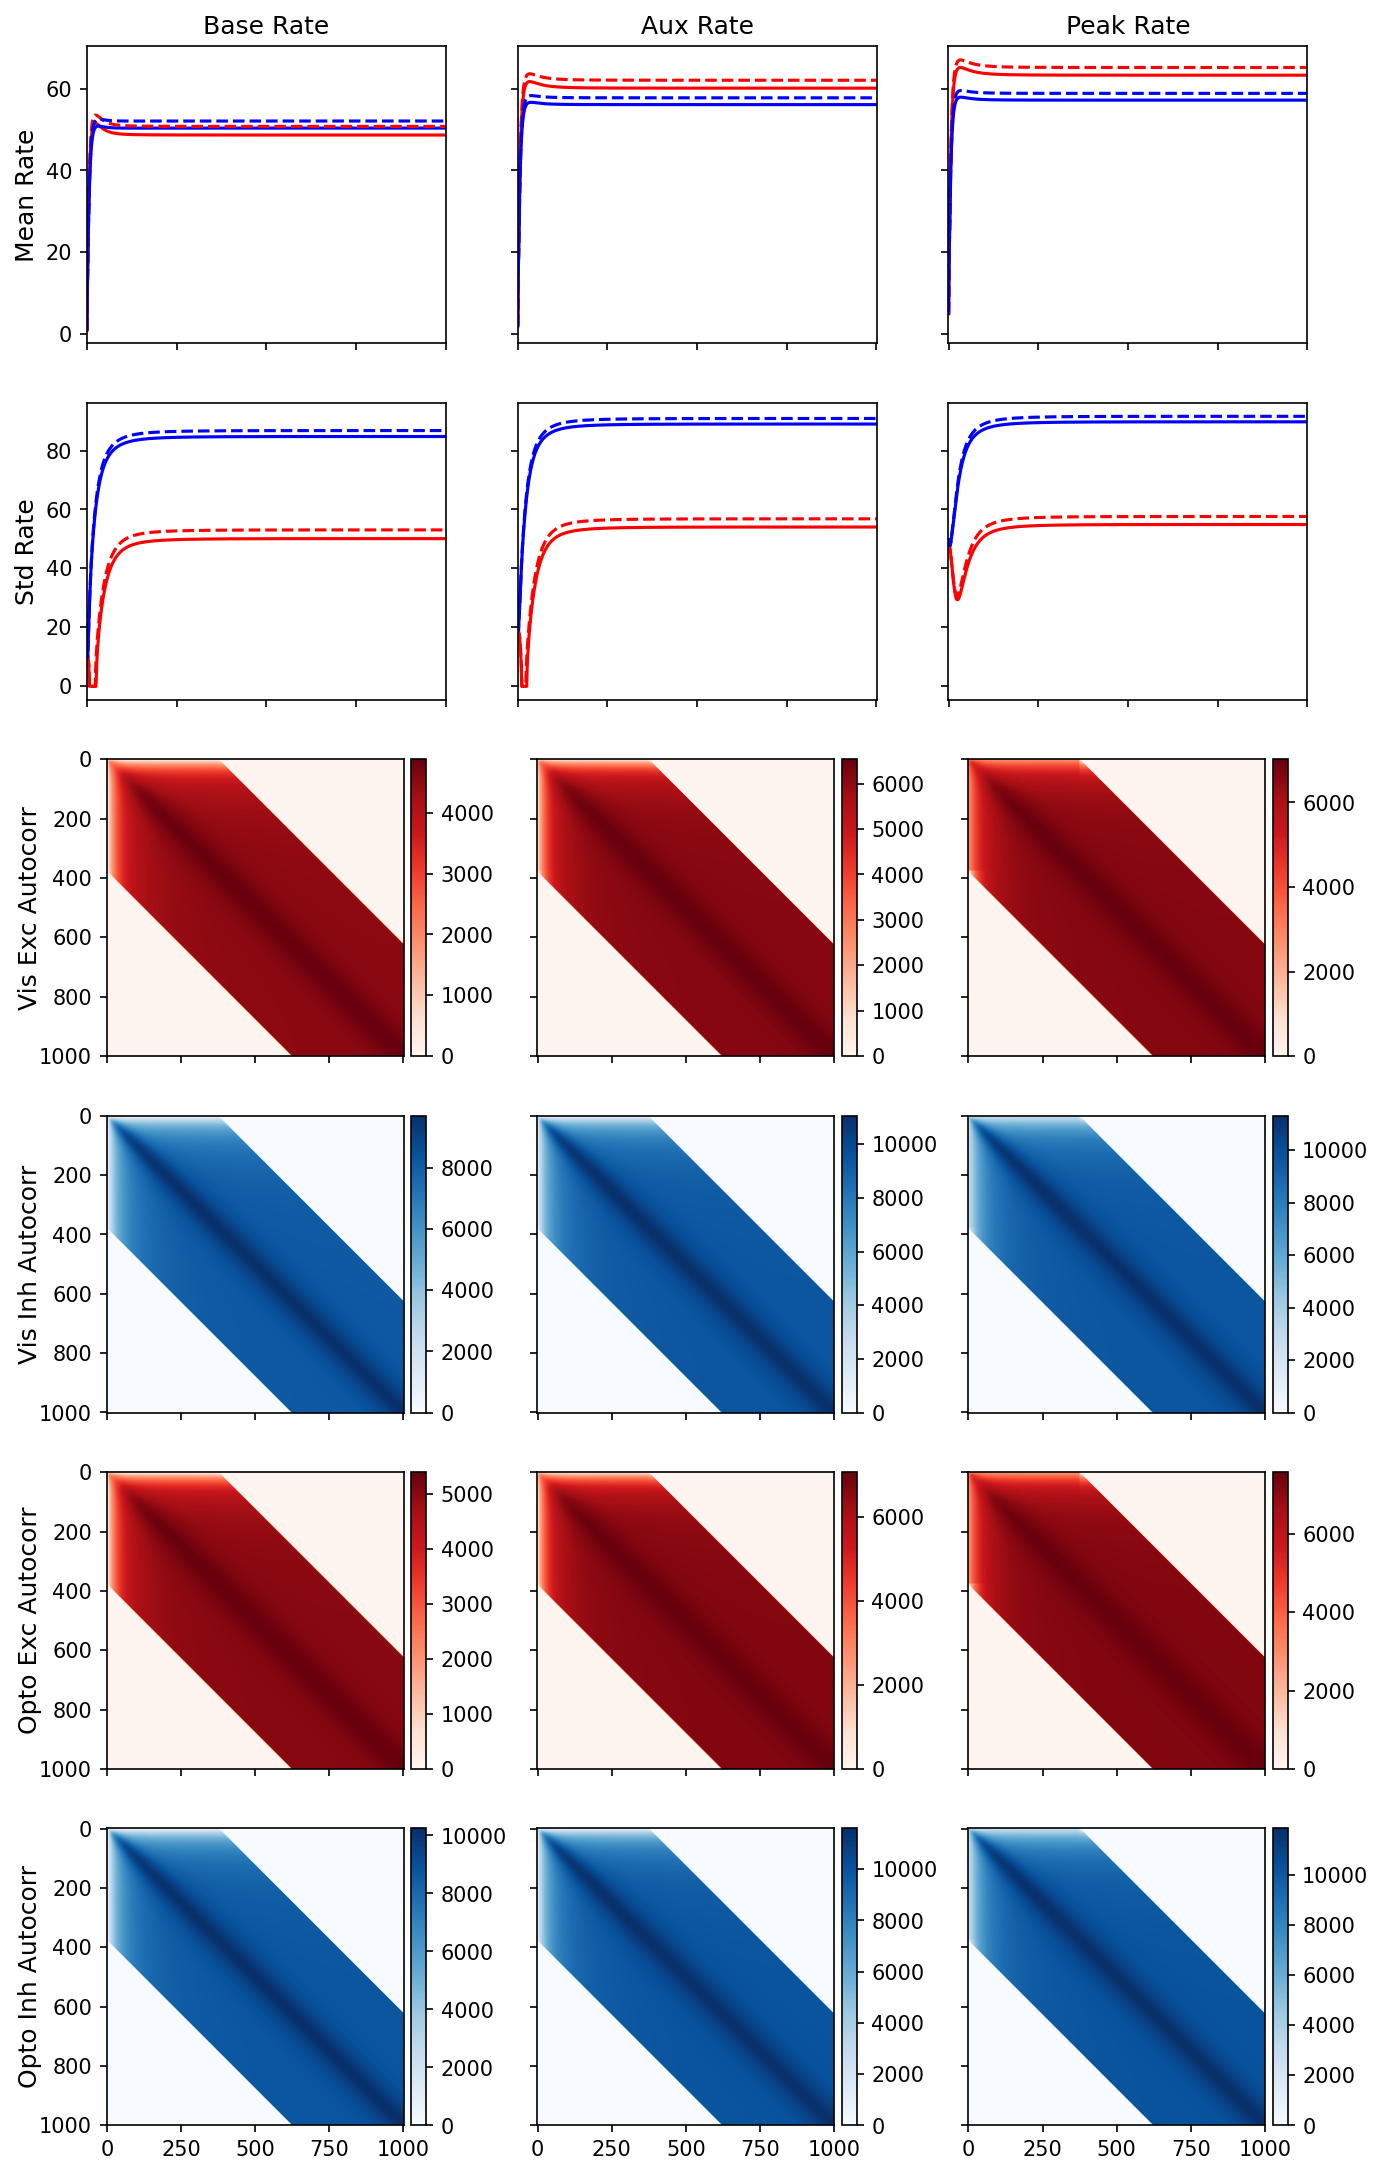

In [183]:
full_rb,full_ra,full_rp = res_dict['full_rb'],res_dict['full_ra'],res_dict['full_rp']
full_Crb,full_Cra,full_Crp = res_dict['full_Crb'],res_dict['full_Cra'],res_dict['full_Crp']

fig,axs = plt.subplots(6,3,figsize=(3.5*3,3*6),dpi=150,sharex=True,sharey='row')

axs[0,0].plot(full_rb[0],'r-')
axs[0,0].plot(full_rb[1],'b-')
axs[0,0].plot(full_rb[2],'r--')
axs[0,0].plot(full_rb[3],'b--')
axs[0,1].plot(full_ra[0],'r-')
axs[0,1].plot(full_ra[1],'b-')
axs[0,1].plot(full_ra[2],'r--')
axs[0,1].plot(full_ra[3],'b--')
axs[0,2].plot(full_rp[0],'r-')
axs[0,2].plot(full_rp[1],'b-')
axs[0,2].plot(full_rp[2],'r--')
axs[0,2].plot(full_rp[3],'b--')

axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[0])-full_rb[0]**2,0)),'r-')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[1])-full_rb[1]**2,0)),'b-')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[2])-full_rb[2]**2,0)),'r--')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[3])-full_rb[3]**2,0)),'b--')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[0])-full_ra[0]**2,0)),'r-')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[1])-full_ra[1]**2,0)),'b-')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[2])-full_ra[2]**2,0)),'r--')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[3])-full_ra[3]**2,0)),'b--')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[0])-full_rp[0]**2,0)),'r-')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[1])-full_rp[1]**2,0)),'b-')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[2])-full_rp[2]**2,0)),'r--')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[3])-full_rp[3]**2,0)),'b--')

imshowbar(fig,axs[2+0,0],full_Crb[0],cmap='Reds')
imshowbar(fig,axs[2+1,0],full_Crb[1],cmap='Blues')
imshowbar(fig,axs[2+2,0],full_Crb[2],cmap='Reds')
imshowbar(fig,axs[2+3,0],full_Crb[3],cmap='Blues')
imshowbar(fig,axs[2+0,1],full_Cra[0],cmap='Reds')
imshowbar(fig,axs[2+1,1],full_Cra[1],cmap='Blues')
imshowbar(fig,axs[2+2,1],full_Cra[2],cmap='Reds')
imshowbar(fig,axs[2+3,1],full_Cra[3],cmap='Blues')
imshowbar(fig,axs[2+0,2],full_Crp[0],cmap='Reds')
imshowbar(fig,axs[2+1,2],full_Crp[1],cmap='Blues')
imshowbar(fig,axs[2+2,2],full_Crp[2],cmap='Reds')
imshowbar(fig,axs[2+3,2],full_Crp[3],cmap='Blues')

axs[0,0].set_title('Base Rate')
axs[0,1].set_title('Aux Rate')
axs[0,2].set_title('Peak Rate')

ytitle(axs[0,0],'Mean Rate',xloc=-0.2,fontsize=12)
ytitle(axs[1,0],'Std Rate',xloc=-0.2,fontsize=12)
ytitle(axs[2+0,0],'Vis Exc Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+1,0],'Vis Inh Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+2,0],'Opto Exc Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+3,0],'Opto Inh Autocorr',xloc=-0.3,fontsize=12)

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_38263/3798531483.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(np.fmax(1e-1,0.5*15**2/np.log(np.fmax(np.abs((res_dict['full_Crp']-res_dict['full_Crb'])/(res_dict['full_Cra']-res_dict['full_Crb'])),1+1e-1)))[0])


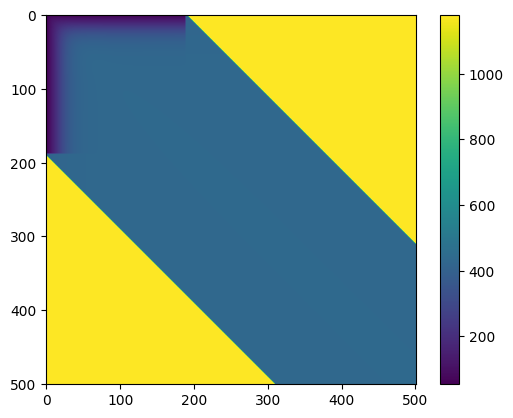

In [176]:
plt.imshow(np.fmax(1e-1,0.5*15**2/np.log(np.fmax(np.abs((res_dict['full_Crp']-res_dict['full_Crb'])/(res_dict['full_Cra']-res_dict['full_Crb'])),1+1e-1)))[0])
plt.colorbar()

In [172]:
np.sqrt(np.fmax(1e-1,0.5*15**2/np.log(np.fmax(
    np.abs((res_dict['full_Crp']-res_dict['full_Crb'])/(res_dict['full_Cra']-res_dict['full_Crb'])),
    1+1e-4)))[0])

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_38263/2936656453.py:2: RuntimeWarning: invalid value encountered in divide
  np.abs((res_dict['full_Crp']-res_dict['full_Crb'])/(res_dict['full_Cra']-res_dict['full_Crb'])),


array([[   7.3553424,    7.3553424,    7.3553424, ..., 1060.5988   ,
        1060.5988   , 1060.5988   ],
       [   7.3553424,    7.535173 ,    7.6349335, ..., 1060.5988   ,
        1060.5988   , 1060.5988   ],
       [   7.3553424,    7.6349335,    7.825162 , ..., 1060.5988   ,
        1060.5988   , 1060.5988   ],
       ...,
       [1060.5988   , 1060.5988   , 1060.5988   , ...,   20.939072 ,
          20.939001 ,   20.938885 ],
       [1060.5988   , 1060.5988   , 1060.5988   , ...,   20.939001 ,
          20.93905  ,   20.939028 ],
       [1060.5988   , 1060.5988   , 1060.5988   , ...,   20.938885 ,
          20.939028 ,   20.939116 ]], dtype=float32)

In [184]:
res_dict['sCr']

array([[20.939125, 20.939129, 20.93911 , ..., 20.876768, 20.876768,
        20.876776],
       [25.29173 , 25.291695, 25.291695, ..., 25.234913, 25.234869,
        25.2348  ],
       [21.02494 , 21.024899, 21.024918, ..., 20.969625, 20.969591,
        20.969591],
       [25.265314, 25.265226, 25.265156, ..., 25.213808, 25.213774,
        25.213821]], dtype=float32)

In [185]:
0.8*res_dict['rp'][0]+0.2*res_dict['rp'][1]

62.0911247253418

In [43]:
this_prms = prms.copy()
this_prms['J'] = prms['J']*3**(np.arange(0,8+1)/8)[3]

reload(dmft)

Twrm = 1.0
Tsav = 0.5
dt = 0.01/5

first_res_dict =\
    dmft.run_first_stage_dmft(this_prms,bX+aXs[-1],eX,'./../results',ri,Twrm,Tsav,dt,
                              return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 143.92341599999963 s


In [44]:
this_prms = prms.copy()
this_prms['J'] = prms['J']*3**(np.arange(0,8+1)/8)[3]

reload(dmft)

Twrm = 0.5
Tsav = 0.5
dt = 0.01/5

sec_res_dict =\
    dmft.run_second_stage_dmft(first_res_dict,this_prms,bX+aXs[-1],eX,'./../results',ri,Twrm,Tsav,dt,
                              return_full=True)

0.05% completed
0.10% completed
0.15% completed
0.20% completed
0.25% completed
0.30% completed
0.35% completed
0.40% completed
0.45% completed
0.50% completed
0.55% completed
0.60% completed
0.65% completed
0.70% completed
0.75% completed
0.80% completed
0.85% completed
0.90% completed
0.95% completed
1.00% completed
integrating second stage took 721.7999599999994 s


In [45]:
res_dict = {**first_res_dict, **sec_res_dict}

In [46]:
# full_Rrdr = 0.5*(res_dict['full_Cr'][2:] - res_dict['full_Cr'][:2] - res_dict['full_Cdr'])
Rrdr = 0.5*(res_dict['Cr'][2:] - res_dict['Cr'][:2] - res_dict['Cdr'])

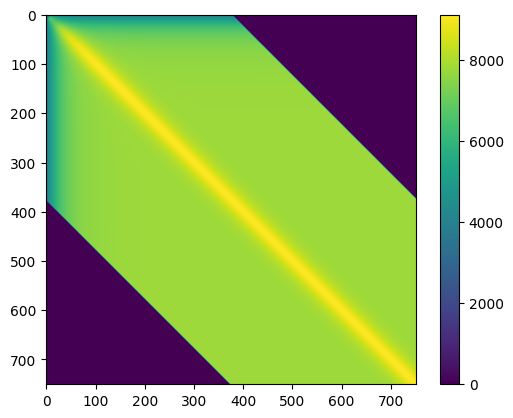

In [47]:
plt.imshow(res_dict['full_Cr'][0])
plt.colorbar()

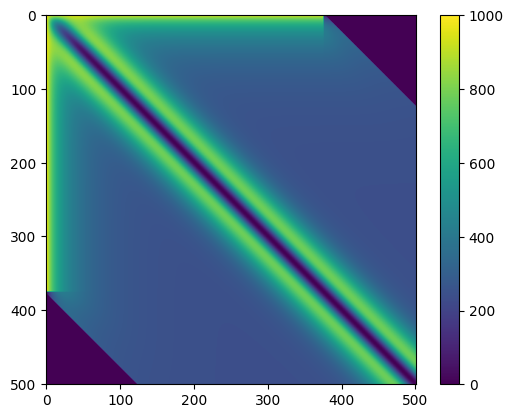

In [53]:
plt.imshow(res_dict['full_Cdr'][0])
plt.colorbar()

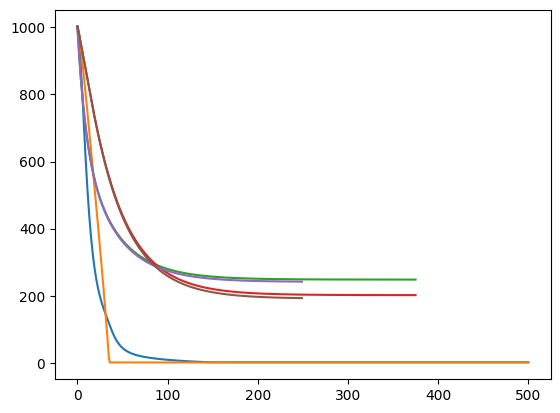

In [54]:
reload(dmft)
Nsav = len(res_dict['Cr'][0])
plt.plot(dmft.each_diag(res_dict['full_Cdr']).T)
plt.plot(dmft.each_diag(res_dict['full_Cdr'],Nsav//2).T)
plt.plot(dmft.each_diag(res_dict['full_Cdr'],Nsav).T)

In [50]:
dmft.grid_stat(np.mean,res_dict['Cdr'],4,dt)

array([264.12320497, 250.35371236])

In [55]:
reload(dmft)

FE,FI,ME,MI,CE,CI = dmft.base_itp_moments('./../results')
FL,ML,CL = dmft.opto_itp_moments('./../results',L,CVL)

def base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]

def base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]

def opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def diff_R(mu1i,mu2i,Sig1ii,Sig2ii,kij,out):
#     out[0] = dmft.R(ME,ML,mu1i[0],mu2i[0],Sig1ii[0],Sig2ii[0],kij[0])
#     out[1] = dmft.R(MI,MI,mu1i[1],mu2i[1],Sig1ii[1],Sig2ii[1],kij[1])
    out[0] = dmft.R_simp(ME,ML,mu1i[0],mu2i[0],Sig1ii[0],Sig2ii[0],kij[0])
    out[1] = dmft.R_simp(MI,MI,mu1i[1],mu2i[1],Sig1ii[1],Sig2ii[1],kij[1])
    
Rphi = np.zeros(2)

diff_R(res_dict['mu'][:2],res_dict['mu'][2:],res_dict['Sig'][:2,0],res_dict['Sig'][2:,0],
       0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-res_dict['Sigd'][:,-1]),Rphi)
Rphi

array([ 7866.59243916, 12157.5840972 ])

In [56]:
res_dict['Cr'][:2,-1] + res_dict['Cr'][2:,-1] - 2*Rphi - res_dict['Cdr'][:,-1]

array([-0.18072793, -0.18732893])

In [57]:
Rphi - res_dict['Cr'][:2,-1] - Rrdr[:,-1]

array([0.09036396, 0.09366446])

In [466]:
this_prms = prms.copy()

reload(dmft)

Twrm = 1.0
Tsav = 0.5
dt = 0.01/5

res_dict =\
    dmft.run_two_stage_dmft(this_prms,bX+aXs[-1],eX,'./../results',ri,Twrm,Tsav,dt,
                              return_full=True)

0.20% completed
0.40% completed
0.60% completed
0.80% completed
1.00% completed
integrating first stage took 143.48765700000058 s
0.10% completed
0.20% completed
0.30% completed
0.40% completed
0.50% completed
0.60% completed
0.70% completed
0.80% completed
0.90% completed
1.00% completed
integrating second stage took 1561.7190789999995 s


In [512]:
full_Rrdr = 0.5*(res_dict['full_Cr'][2:] - res_dict['full_Cr'][:2] - res_dict['full_Cdr'])
Rrdr = 0.5*(res_dict['Cr'][2:] - res_dict['Cr'][:2] - res_dict['Cdr'])

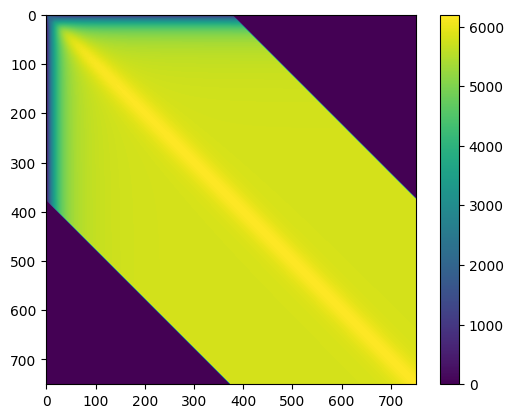

In [467]:
plt.imshow(res_dict['full_Cr'][0])
plt.colorbar()

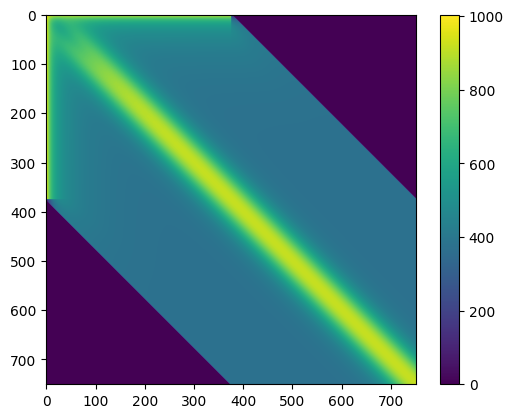

In [469]:
plt.imshow(res_dict['full_Cdr'][0])
plt.colorbar()

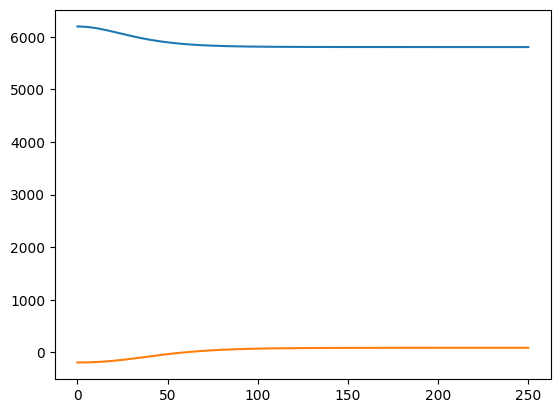

In [545]:
plt.plot(res_dict['Cr'][0])
plt.plot(0.5*(res_dict['Cr'][2]-res_dict['Cr'][0]-res_dict['Cdr'][0]))

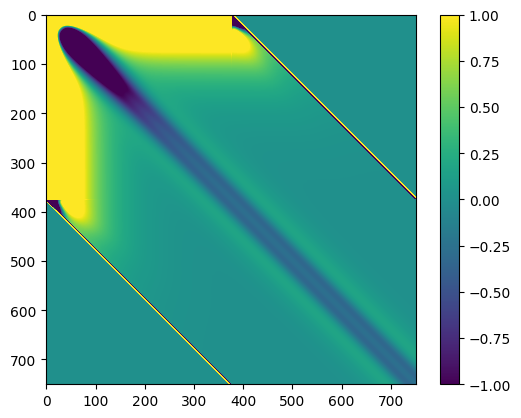

In [471]:
plt.imshow(np.roll(res_dict['full_Cdr'][0],1,1)+np.roll(res_dict['full_Cdr'][0],1,0)-2*res_dict['full_Cdr'][0],
          vmin=-1,vmax=1)
plt.colorbar()

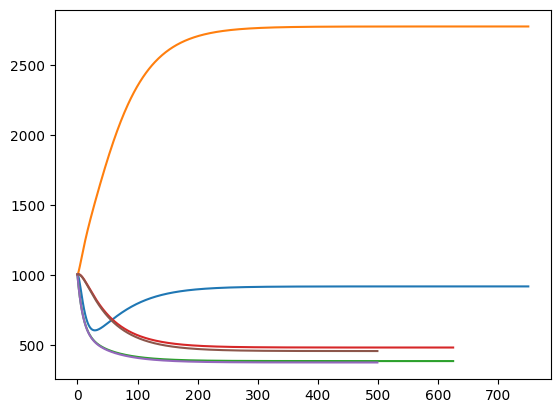

In [473]:
reload(dmft)
Nsav = len(res_dict['Cr'][0])
plt.plot(dmft.each_diag(res_dict['full_Cdr']).T)
plt.plot(dmft.each_diag(res_dict['full_Cdr'],Nsav//2).T)
plt.plot(dmft.each_diag(res_dict['full_Cdr'],Nsav).T)

In [474]:
dmft.grid_stat(np.mean,res_dict['Cdr'],4,dt)

array([400.64866396, 550.5524906 ])

In [531]:
reload(dmft)

FE,FI,ME,MI,CE,CI = dmft.base_itp_moments('./../results')
FL,ML,CL = dmft.opto_itp_moments('./../results',L,CVL)

def base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]

def base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]

def opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def diff_R(mu1i,mu2i,Sig1ii,Sig2ii,kij,out):
#     out[0] = dmft.R(ME,ML,mu1i[0],mu2i[0],Sig1ii[0],Sig2ii[0],kij[0])
#     out[1] = dmft.R(MI,MI,mu1i[1],mu2i[1],Sig1ii[1],Sig2ii[1],kij[1])
    out[0] = dmft.R_simp(ME,ML,mu1i[0],mu2i[0],Sig1ii[0],Sig2ii[0],kij[0])
    out[1] = dmft.R_simp(MI,MI,mu1i[1],mu2i[1],Sig1ii[1],Sig2ii[1],kij[1])
    
Rphi = np.zeros(2)

diff_R(res_dict['mu'][:2],res_dict['mu'][2:],res_dict['Sig'][:2,0],res_dict['Sig'][2:,0],
       0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-res_dict['Sigd'][:,-1]),Rphi)
Rphi

array([5323.82258736, 8068.74430172])

In [503]:
print(ME(res_dict['mu'][0],res_dict['Sig'][0,0])*ML(res_dict['mu'][2],res_dict['Sig'][2,0]))

[3345.04149852]


In [504]:
0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-res_dict['Sigd'][:,-1])/\
    np.sqrt(res_dict['Sig'][:2,0]*res_dict['Sig'][2:,0])

array([0.8563011, 0.8554716], dtype=float32)

In [505]:
0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-res_dict['Sigd'][:,-1])

array([0.00052636, 0.00196299], dtype=float32)

In [506]:
res_dict['Sigd'][:,-1]

array([2.3929962e-05, 9.3561714e-05], dtype=float32)

In [521]:
SigW@res_dict['Cdr'][:,-1]

array([2.3929962e-05, 9.3561714e-05], dtype=float32)

In [508]:
res_dict['Cr'][:2,-1] + res_dict['Cr'][2:,-1] - 2*Rphi - res_dict['Cdr'][:,-1]

array([-0.03034373, -0.03453404])

In [525]:
Rphi - res_dict['Cr'][:2,-1] - Rrdr[:,-1]

array([0.01517186, 0.01677874])

In [509]:
res_dict['Cdr'][:,-1]

array([373.47717, 455.23465], dtype=float32)

In [548]:
res_dict['Cr'][:2,-1]

array([5806.7544, 9822.042 ], dtype=float32)

In [533]:
sim_Cdr = np.array([623.7681408404081,907.8279910825952])

tau = np.array([ri.tE,ri.tI],dtype=np.float32)
W = J*np.array([[1,-gE],[1./beta,-gI/beta]],dtype=np.float32)
Ks = np.array([K,K/4],dtype=np.float32)
H = (bX+aXs[-1])*K*J*np.array([hE,hI/beta],dtype=np.float32)
eH = eX

muH = tau*H
SigH = (muH*eH)**2

muW = tau[:,None]*W*Ks
SigW = tau[:,None]**2*W**2*Ks

sim_Sigd = SigW@sim_Cdr

In [534]:
Rphi = np.zeros(2)

diff_R(res_dict['mu'][:2],res_dict['mu'][2:],res_dict['Sig'][:2,0],res_dict['Sig'][2:,0],
       0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-sim_Sigd),Rphi)
Rphi

array([5829.5081117 , 9667.92145991])

In [538]:
0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-sim_Sigd)/\
    np.sqrt(res_dict['Sig'][:2,0]*res_dict['Sig'][2:,0])

array([0.83734617, 0.83603557])

In [540]:
0.5*(res_dict['Sig'][:2,-1]+res_dict['Sig'][2:,-1]-sim_Sigd)

array([0.00051471, 0.00191839])

In [541]:
SigW@sim_Cdr

array([4.72328936e-05, 1.82758561e-04])

In [542]:
res_dict['Cr'][:2,-1] + res_dict['Cr'][2:,-1] - 2*Rphi - sim_Cdr

array([-123.48651269,  -32.60841091])

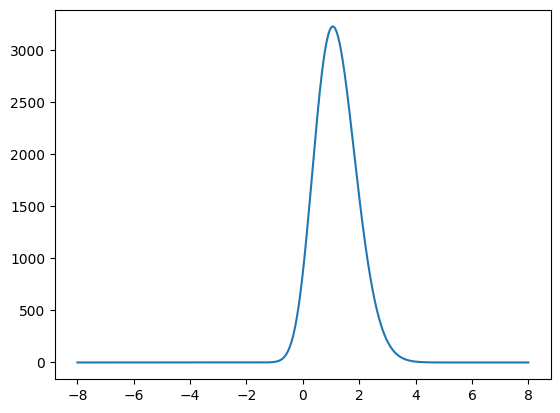

In [432]:
xs = np.linspace(-8,8,10001)
plt.plot(xs,dmft.R_int(ME,ML,res_dict['mu'][0],res_dict['mu'][2],res_dict['Sig'][0,0],res_dict['Sig'][2,0],
       0.5*(res_dict['Sig'][0,-1]+res_dict['Sig'][2,-1]-res_dict['Sigd'][0,-1]),xs))

# Interpolate Moments

In [3]:
def μtox(μ):
    return np.sign(μ/100-0.2)*np.abs(μ/100-0.2)**0.5

def xtoμ(x):
    return 100*(np.sign(x)*np.abs(x)**2.0+0.2)
    
def base_itp_moments():
    with open('./../results/itp_ranges'+'.pkl', 'rb') as handle:
        ranges_dict = pickle.load(handle)
    
    φxrange = ranges_dict['Ph']['xrange']
    φxs = np.linspace(φxrange[0],φxrange[1],round(φxrange[2])).astype(np.float32)
    φEs = np.load('./../results/PhE_itp.npy').astype(np.float32)
    φIs = np.load('./../results/PhI_itp.npy').astype(np.float32)
    
    Mxrange = ranges_dict['M']['xrange']
    Mxs = np.linspace(Mxrange[0],Mxrange[1],round(Mxrange[2])).astype(np.float32)
    Mσrange = ranges_dict['M']['σrange']
    Mσs = np.linspace(Mσrange[0],Mσrange[1],round(Mσrange[2])).astype(np.float32)
    MEs = np.load('./../results/ME_itp.npy').astype(np.float32)
    MIs = np.load('./../results/MI_itp.npy').astype(np.float32)
    
    Cxrange = ranges_dict['C']['xrange']
    Cxs = np.linspace(Cxrange[0],Cxrange[1],round(Cxrange[2])).astype(np.float32)
    Cσrange = ranges_dict['C']['σrange']
    Cσs = np.linspace(Cσrange[0],Cσrange[1],round(Cσrange[2])).astype(np.float32)
    Ccrange = ranges_dict['C']['crange']
    Ccs = np.linspace(Ccrange[0],Ccrange[1],round(Ccrange[2])).astype(np.float32)
    CEs = np.load('./../results/CE_itp.npy').astype(np.float32)
    CIs = np.load('./../results/CI_itp.npy').astype(np.float32)
    
    φE_itp = RegularGridInterpolator((φxs,),φEs,bounds_error=False,fill_value=None)
    φI_itp = RegularGridInterpolator((φxs,),φIs,bounds_error=False,fill_value=None)
    
    ME_itp = RegularGridInterpolator((Mσs,Mxs),MEs,bounds_error=False,fill_value=None)
    MI_itp = RegularGridInterpolator((Mσs,Mxs),MIs,bounds_error=False,fill_value=None)
    
    CE_itp = RegularGridInterpolator((Ccs,Cσs,Cxs),CEs,bounds_error=False,fill_value=None)
    CI_itp = RegularGridInterpolator((Ccs,Cσs,Cxs),CIs,bounds_error=False,fill_value=None)
    
    def φE(μ):
        try:
            return φE_itp(μtox(1e3*μ)[:,None])
        except:
            return φE_itp([μtox(1e3*μ)])
    def φI(μ):
        try:
            return φI_itp(μtox(1e3*μ)[:,None])
        except:
            return φI_itp([μtox(1e3*μ)])
    
    def ME(μ,Σ):
        return ME_itp(np.row_stack(list(np.broadcast(1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    def MI(μ,Σ):
        return MI_itp(np.row_stack(list(np.broadcast(1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    
    def CE(μ,Σ,k):
        c = np.sign(k)*np.fmin(np.abs(k)/Σ,1)
        return CE_itp(np.row_stack(list(np.broadcast(c,1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    def CI(μ,Σ,k):
        c = np.sign(k)*np.fmin(np.abs(k)/Σ,1)
        return CI_itp(np.row_stack(list(np.broadcast(c,1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    
    return φE,φI,ME,MI,CE,CI
    
def opto_itp_moments(L,CVL):
    with open('./../results/itp_ranges'+'.pkl', 'rb') as handle:
        ranges_dict = pickle.load(handle)
    
    φxrange = ranges_dict['PhL']['xrange']
    φxs = np.linspace(φxrange[0],φxrange[1],round(φxrange[2])).astype(np.float32)
    φLs = np.load('./../results/PhL_itp'+'_L={:.2f}'.format(L)+'_CVL={:.2f}'.format(CVL)+'.npy').astype(np.float32)
    
    Mxrange = ranges_dict['ML']['xrange']
    Mxs = np.linspace(Mxrange[0],Mxrange[1],round(Mxrange[2])).astype(np.float32)
    Mσrange = ranges_dict['ML']['σrange']
    Mσs = np.linspace(Mσrange[0],Mσrange[1],round(Mσrange[2])).astype(np.float32)
    MLs = np.load('./../results/ML_itp'+'_L={:.2f}'.format(L)+'_CVL={:.2f}'.format(CVL)+'.npy').astype(np.float32)
    
    Cxrange = ranges_dict['CL']['xrange']
    Cxs = np.linspace(Cxrange[0],Cxrange[1],round(Cxrange[2])).astype(np.float32)
    Cσrange = ranges_dict['CL']['σrange']
    Cσs = np.linspace(Cσrange[0],Cσrange[1],round(Cσrange[2])).astype(np.float32)
    Ccrange = ranges_dict['CL']['crange']
    Ccs = np.linspace(Ccrange[0],Ccrange[1],round(Ccrange[2])).astype(np.float32)
    CLs = np.load('./../results/CL_itp'+'_L={:.2f}'.format(L)+'_CVL={:.2f}'.format(CVL)+'.npy').astype(np.float32)
    
    φL_itp = RegularGridInterpolator((φxs,),φLs,bounds_error=False,fill_value=None)
    
    ML_itp = RegularGridInterpolator((Mσs,Mxs),MLs,bounds_error=False,fill_value=None)
    
    CL_itp = RegularGridInterpolator((Ccs,Cσs,Cxs),CLs,bounds_error=False,fill_value=None)
    
    def φL(μ):
        try:
            return φL_itp(μtox(1e3*μ)[:,None])
        except:
            return φL_itp([μtox(1e3*μ)])
    
    def ML(μ,Σ):
        return ML_itp(np.row_stack(list(np.broadcast(1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    
    def CL(μ,Σ,k):
        c = np.sign(k)*np.fmin(np.abs(k)/Σ,1)
        return CL_itp(np.row_stack(list(np.broadcast(c,1e3*np.sqrt(Σ),μtox(1e3*μ)))))
    
    return φL,ML,CL

# Define First Stage Ring DMFT Functions

In [50]:
def doub_vec(A):
    return np.concatenate([A,A])

def doub_mat(A):
    return np.block([[A,np.zeros_like(A)],[np.zeros_like(A),A]])

def each_diag(A):
    return np.einsum('ijj->ij',A)

def each_matmul(A,B):
    return np.einsum('ijk,jk->ik',A,B)

def grid_stat(stat,A,Tstat,dt):
    Ntyp = A.shape[0]
    Nsav = A.shape[1]
    Nstat = round(Tstat/dt)+1
    A_ext = np.zeros((Ntyp,Nstat))
    if Nsav < Nstat:
        A_ext[:,:Nsav] = A
        A_ext[:,Nsav:] = A[:,-1:]
    else:
        A_ext = A[:,:Nstat]
    A_mat = np.array([toeplitz(A_ext[typ_idx]) for typ_idx in range(Ntyp)])
    return stat(A_mat,axis=(1,2))

In [5]:
def base_M(μi,Σii,out):
    out[0] = ME(μi[0],Σii[0])[0]
    out[1] = MI(μi[1],Σii[1])[0]

def base_C(μi,Σii,Σij,out):
    out[0] = CE(μi[0],Σii[0],Σij[0])[0]
    out[1] = CI(μi[1],Σii[1],Σij[1])[0]
    
def opto_M(μi,Σii,out):
    out[0] = ML(μi[0],Σii[0])[0]
    out[1] = MI(μi[1],Σii[1])[0]

def opto_C(μi,Σii,Σij,out):
    out[0] = CL(μi[0],Σii[0],Σij[0])[0]
    out[1] = CI(μi[1],Σii[1],Σij[1])[0]

In [6]:
def sparse_dmft(τ,W,K,Hb,Hp,εH,sW,sH,sa,M_fn,C_fn,Twrm,Tsav,dt,
                rb0=None,ra0=None,rp0=None,Crb0=None,Cra0=None,Crp0=None):
    Ntyp = len(Hb)
    Nint = round((Twrm+Tsav)/dt)+1
    Nclc = round(1.5*Tsav/dt)+1
    Nsav = round(Tsav/dt)+1
    
    rb = np.zeros((Ntyp,Nint),dtype=np.float32)
    ra = np.zeros((Ntyp,Nint),dtype=np.float32)
    rp = np.zeros((Ntyp,Nint),dtype=np.float32)
    Crb = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    Cra = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    Crp = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    
    if rb0 is None:
        rb0 = 1e-8*np.ones((Ntyp),dtype=np.float32)
    if ra0 is None:
        ra0 = 2e-8*np.ones((Ntyp),dtype=np.float32)
    if rp0 is None:
        rp0 = 5e-8*np.ones((Ntyp),dtype=np.float32)
    if Crb0 is None:
        Crb0 = 1e2*np.ones((Ntyp,1),dtype=np.float32)
    if Cra0 is None:
        Cra0 = 4e2*np.ones((Ntyp,1),dtype=np.float32)
    if Crp0 is None:
        Crp0 = 25e2*np.ones((Ntyp,1),dtype=np.float32)
        
    τinv = 1/τ
    dtτinv = dt/τ
    dtτinv2 = dtτinv**2
    
    sa2 = sa**2
    sW2 = sW**2
    sH2 = sH**2
        
    μW = τ[:,None]*W*K
    ΣW = τ[:,None]**2*W**2*K
    
    μHb = τ*Hb
    ΣHb = (μHb*εH)**2
    μHa = τ*(Hb+(Hp-Hb)*np.exp(-0.5*sa2/sH2))
    ΣHa = (μHa*εH)**2
    μHp = τ*Hp
    ΣHp = (μHp*εH)**2
    
    rb[:,0] = rb0
    ra[:,0] = ra0
    rp[:,0] = rp0
    
    NCr0 = Crb0.shape[1]
    if Nclc > NCr0:
        Crb[:,0,:NCr0] = Crb0
        Crb[:,0,NCr0:Nclc] = Crb0[:,-1:]
        Crb[:,:NCr0,0] = Crb0
        Crb[:,NCr0:Nclc,0] = Crb0[:,-1:]
        
        Cra[:,0,:NCr0] = Cra0
        Cra[:,0,NCr0:Nclc] = Cra0[:,-1:]
        Cra[:,:NCr0,0] = Cra0
        Cra[:,NCr0:Nclc,0] = Cra0[:,-1:]
        
        Crp[:,0,:NCr0] = Crp0
        Crp[:,0,NCr0:Nclc] = Crp0[:,-1:]
        Crp[:,:NCr0,0] = Crp0
        Crp[:,NCr0:Nclc,0] = Crp0[:,-1:]
    else:
        Crb[:,0,:Nclc] = Crb0[:,:Nclc]
        Crb[:,:Nclc,0] = Crb0[:,:Nclc]
        
        Cra[:,0,:Nclc] = Cra0[:,:Nclc]
        Cra[:,:Nclc,0] = Cra0[:,:Nclc]
        
        Crp[:,0,:Nclc] = Crp0[:,:Nclc]
        Crp[:,:Nclc,0] = Crp0[:,:Nclc]
        
    Mφb = np.empty((Ntyp),dtype=np.float32)
    Mφa = np.empty((Ntyp),dtype=np.float32)
    Mφp = np.empty((Ntyp),dtype=np.float32)
    Cφb = np.empty((Ntyp),dtype=np.float32)
    Cφa = np.empty((Ntyp),dtype=np.float32)
    Cφp = np.empty((Ntyp),dtype=np.float32)
    
    for i in range(Nint-1):
        rbi = rb[:,i]
        rai = ra[:,i]
        rpi = rp[:,i]
        sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))
        sWr2i = sW2+sr2i
        Crbii = Crb[:,i,i]
        Craii = Cra[:,i,i]
        Crpii = Crp[:,i,i]
        sCr2ii = 0.5*sa2/np.log(np.fmax(np.abs((Crpii-Crbii)/(Craii-Crbii)),1+1e-4))
        sWCr2ii = sW2+sCr2ii
        μbi = μW@rbi + μHb
        μai = ((1-np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i))*μW)@rbi +\
            (np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i)*μW)@rpi + μHa
        μpi = ((1-np.sqrt(sr2i/sWr2i))*μW)@rbi + (np.sqrt(sr2i/sWr2i)*μW)@rpi + μHp
        Σbii = ΣW@Crbii + ΣHb
        Σaii = ((1-np.sqrt(sCr2ii/sWCr2ii)*np.exp(-0.5*sa2/sWCr2ii))*ΣW)@Crbii +\
            (np.sqrt(sCr2ii/sWCr2ii)*np.exp(-0.5*sa2/sWCr2ii)*ΣW)@Crpii + ΣHa
        Σpii = ((1-np.sqrt(sCr2ii/sWCr2ii))*ΣW)@Crbii + (np.sqrt(sCr2ii/sWCr2ii)*ΣW)@Crpii + ΣHp
        M_fn(μbi,Σbii,Mφb)
        M_fn(μai,Σaii,Mφa)
        M_fn(μpi,Σpii,Mφp)
        kb1 = τinv*(-rbi + Mφb)
        ka1 = τinv*(-rai + Mφa)
        kp1 = τinv*(-rpi + Mφp)
        
        rbi = rb[:,i] + 0.5*dt*kb1
        rai = ra[:,i] + 0.5*dt*ka1
        rpi = rp[:,i] + 0.5*dt*kp1
        sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))
        sWr2i = sW2+sr2i
        μbi = μW@rbi + μHb
        μai = ((1-np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i))*μW)@rbi +\
            (np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i)*μW)@rpi + μHa
        μpi = ((1-np.sqrt(sr2i/sWr2i))*μW)@rbi + (np.sqrt(sr2i/sWr2i)*μW)@rpi + μHp
        M_fn(μbi,Σbii,Mφb)
        M_fn(μai,Σaii,Mφa)
        M_fn(μpi,Σpii,Mφp)
        kb2 = τinv*(-rbi + Mφb)
        ka2 = τinv*(-rai + Mφa)
        kp2 = τinv*(-rpi + Mφp)
        
        rbi = rb[:,i] + 0.5*dt*kb2
        rai = ra[:,i] + 0.5*dt*ka2
        rpi = rp[:,i] + 0.5*dt*kp2
        sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))
        sWr2i = sW2+sr2i
        μbi = μW@rbi + μHb
        μai = ((1-np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i))*μW)@rbi +\
            (np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i)*μW)@rpi + μHa
        μpi = ((1-np.sqrt(sr2i/sWr2i))*μW)@rbi + (np.sqrt(sr2i/sWr2i)*μW)@rpi + μHp
        M_fn(μbi,Σbii,Mφb)
        M_fn(μai,Σaii,Mφa)
        M_fn(μpi,Σpii,Mφp)
        kb3 = τinv*(-rbi + Mφb)
        ka3 = τinv*(-rai + Mφa)
        kp3 = τinv*(-rpi + Mφp)
        
        rbi = rb[:,i] + dt*kb3
        rai = ra[:,i] + dt*ka3
        rpi = rp[:,i] + dt*kp3
        sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))
        sWr2i = sW2+sr2i
        μbi = μW@rbi + μHb
        μai = ((1-np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i))*μW)@rbi +\
            (np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i)*μW)@rpi + μHa
        μpi = ((1-np.sqrt(sr2i/sWr2i))*μW)@rbi + (np.sqrt(sr2i/sWr2i)*μW)@rpi + μHp
        M_fn(μbi,Σbii,Mφb)
        M_fn(μai,Σaii,Mφa)
        M_fn(μpi,Σpii,Mφp)
        kb4 = τinv*(-rbi + Mφb)
        ka4 = τinv*(-rai + Mφa)
        kp4 = τinv*(-rpi + Mφp)
        
        rb[:,i+1] = rb[:,i] + dt/6*(kb1+2*kb2+2*kb3+kb4)
        ra[:,i+1] = ra[:,i] + dt/6*(ka1+2*ka2+2*ka3+ka4)
        rp[:,i+1] = rp[:,i] + dt/6*(kp1+2*kp2+2*kp3+kp4)
        rbi = rb[:,i]
        rai = ra[:,i]
        rpi = rp[:,i]
        sr2i = 0.5*sa2/np.log(np.fmax(np.abs((rpi-rbi)/(rai-rbi)),1+1e-4))
        sWr2i = sW2+sr2i
        μbi = μW@rbi + μHb
        μai = ((1-np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i))*μW)@rbi +\
            (np.sqrt(sr2i/sWr2i)*np.exp(-0.5*sa2/sWr2i)*μW)@rpi + μHa
        μpi = ((1-np.sqrt(sr2i/sWr2i))*μW)@rbi + (np.sqrt(sr2i/sWr2i)*μW)@rpi + μHp
        
        if np.any(np.abs(rb[:,i+1]) > 1e10) or np.any(np.isnan(rb[:,i+1])):
            print("system diverged when integrating rb")
            return rb,ra,rp,Crb,Cra,Crp,False,False,False
        if np.any(np.abs(ra[:,i+1]) > 1e10) or np.any(np.isnan(ra[:,i+1])):
            print("system diverged when integrating ra")
            return rb,ra,rp,Crb,Cra,Crp,False,False,False
        if np.any(np.abs(rp[:,i+1]) > 1e10) or np.any(np.isnan(rp[:,i+1])):
            print("system diverged when integrating rp")
            return rb,ra,rp,Crb,Cra,Crp,False,False,False

        if i > Nclc-1:
            Crb[:,i+1,i-Nclc] = Crb[:,i,i-Nclc]
            Cra[:,i+1,i-Nclc] = Cra[:,i,i-Nclc]
            Crp[:,i+1,i-Nclc] = Crp[:,i,i-Nclc]
            
        for j in range(max(0,i-Nclc),i+1):
            Crbij = Crb[:,i,j]
            Craij = Cra[:,i,j]
            Crpij = Crp[:,i,j]
            sCr2ij = 0.5*sa2/np.log(np.fmax(np.abs((Crpij-Crbij)/(Craij-Crbij)),1+1e-4))
            sWCr2ij = sW2+sCr2ij
            Σbij = ΣW@Crbij + ΣHb
            Σaij = ((1-np.sqrt(sCr2ij/sWCr2ij)*np.exp(-0.5*sa2/sWCr2ij))*ΣW)@Crbij +\
                (np.sqrt(sCr2ij/sWCr2ij)*np.exp(-0.5*sa2/sWCr2ij)*ΣW)@Crpij + ΣHa
            Σpij = ((1-np.sqrt(sCr2ij/sWCr2ij))*ΣW)@Crbij + (np.sqrt(sCr2ij/sWCr2ij)*ΣW)@Crpij + ΣHp
            C_fn(μbi,Σbii,Σbij,Cφb)
            C_fn(μai,Σaii,Σaij,Cφa)
            C_fn(μpi,Σpii,Σpij,Cφp)
            Crb[:,i+1,j+1] = Crb[:,i,j+1]+Crb[:,i+1,j]-Crb[:,i,j] +\
                dtτinv*(-Crb[:,i+1,j]-Crb[:,i,j+1]+2*Crb[:,i,j]) + dtτinv2*(-Crb[:,i,j]+Cφb)
            Cra[:,i+1,j+1] = Cra[:,i,j+1]+Cra[:,i+1,j]-Cra[:,i,j] +\
                dtτinv*(-Cra[:,i+1,j]-Cra[:,i,j+1]+2*Cra[:,i,j]) + dtτinv2*(-Cra[:,i,j]+Cφa)
            Crp[:,i+1,j+1] = Crp[:,i,j+1]+Crp[:,i+1,j]-Crp[:,i,j] +\
                dtτinv*(-Crp[:,i+1,j]-Crp[:,i,j+1]+2*Crp[:,i,j]) + dtτinv2*(-Crp[:,i,j]+Cφp)
            
            if np.any(np.abs(Crb[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Crb[:,i+1,j+1])):
                print("system diverged when integrating Crb")
                return rb,ra,rp,Crb,Cra,Crp,False,False,False
            if np.any(np.abs(Cra[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Cra[:,i+1,j+1])):
                print("system diverged when integrating Cra")
                return rb,ra,rp,Crb,Cra,Crp,False,False,False
            if np.any(np.abs(Crp[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Crp[:,i+1,j+1])):
                print("system diverged when integrating Crp")
                return rb,ra,rp,Crb,Cra,Crp,False,False,False
                
            Crb[:,j+1,i+1] = Crb[:,i+1,j+1]
            Cra[:,j+1,i+1] = Cra[:,i+1,j+1]
            Crp[:,j+1,i+1] = Crp[:,i+1,j+1]
            
        Ndiv = 5
        if (Ndiv*(i+1)) % (Nint-1) == 0:
            print("{:.2f}% completed".format((i+1)/(Nint-1)))
            
    Crb_diag = each_diag(Crb)
    Cra_diag = each_diag(Cra)
    Crp_diag = each_diag(Crp)
    
    return rb,ra,rp,Crb,Cra,Crp,\
        (np.max(Crb_diag[:,-Nsav:],axis=1)-np.min(Crb_diag[:,-Nsav:],axis=1))/\
            np.mean(Crb_diag[:,-Nsav:],axis=1) < 1e-3,\
        (np.max(Cra_diag[:,-Nsav:],axis=1)-np.min(Cra_diag[:,-Nsav:],axis=1))/\
            np.mean(Cra_diag[:,-Nsav:],axis=1) < 1e-3,\
        (np.max(Crp_diag[:,-Nsav:],axis=1)-np.min(Crp_diag[:,-Nsav:],axis=1))/\
            np.mean(Crp_diag[:,-Nsav:],axis=1) < 1e-3

def doub_sparse_dmft(τ,W,K,Hb,Hp,εH,sW,sH,sa,M_fns,C_fns,Twrm,Tsav,dt,
                     rb0=None,ra0=None,rp0=None,Crb0=None,Cra0=None,Crp0=None):
    Ntyp = len(Hb)
    
    doub_τ = doub_vec(τ)
    doub_W = doub_mat(W)
    doub_K = doub_vec(K)
    doub_Hb = doub_vec(Hb)
    doub_Hp = doub_vec(Hp)
    doub_sW = doub_mat(sW)
    doub_sH = doub_vec(sH)
    
    def doub_M(μi,Σii,out):
        M_fns[0](μi[:Ntyp],Σii[:Ntyp],out[:Ntyp])
        M_fns[1](μi[Ntyp:],Σii[Ntyp:],out[Ntyp:])
        
    def doub_C(μi,Σii,Σij,out):
        C_fns[0](μi[:Ntyp],Σii[:Ntyp],Σij[:Ntyp],out[:Ntyp])
        C_fns[1](μi[Ntyp:],Σii[Ntyp:],Σij[Ntyp:],out[Ntyp:])
        
    return sparse_dmft(doub_τ,doub_W,doub_K,doub_Hb,doub_Hp,εH,doub_sW,doub_sH,sa,doub_M,doub_C,Twrm,Tsav,dt,
                      rb0,ra0,rp0,Crb0,Cra0,Crp0)

# Run First Stage DMFT

In [ ]:
φE,φI,ME,MI,CE,CI = base_itp_moments()
φL,ML,CL = opto_itp_moments(L,CVL)

τ = np.array([0.02,0.01],dtype=np.float32)
W = J*np.array([[1,-gE],[1./beta,-gI/beta]],dtype=np.float32)
Ks = np.array([K,K/4],dtype=np.float32)
Hb = bX*K*J*np.array([hE,hI/beta],dtype=np.float32)
Hp = (bX+aXs[-1])*K*J*np.array([hE,hI/beta],dtype=np.float32)
εH = eX
sW = np.array([[SoriE,SoriI],[SoriE,SoriI]],dtype=np.float32)
sH = np.array([SoriF,SoriF],dtype=np.float32)
sa = 15
    
sa2 = sa**2
sW2 = sW**2
sH2 = sH**2

μW = τ[:,None]*W*Ks
ΣW = τ[:,None]**2*W**2*Ks

μHb = τ*Hb
ΣHb = (μHb*εH)**2

Twrm = 0.75
Tsav = 0.25
dt = 0.01/4
Nsav = round(Tsav/dt)+1

In [8]:
full_rb,full_ra,full_rp,full_Crb,full_Cra,full_Crp,\
    convb,conva,convp = doub_sparse_dmft(τ,W,Ks,Hb,Hp,εH,sW,sH,sa,[base_M,opto_M],[base_C,opto_C],Twrm,Tsav,dt)

rb = full_rb[:,-1]
ra = full_ra[:,-1]
rp = full_rp[:,-1]
Crb = full_Crb[:,-1,-1:-Nsav-1:-1]
Cra = full_Cra[:,-1,-1:-Nsav-1:-1]
Crp = full_Crp[:,-1,-1:-Nsav-1:-1]

sr2 = 0.5*sa2/np.log(np.fmax(np.abs((rp-rb)/(ra-rb)),1+1e-4))
sCr2 = 0.5*sa2/np.log(np.fmax(np.abs((Crp-Crb)/(Cra-Crb)),1+1e-4))

sr = np.sqrt(sr2)
sCr = np.sqrt(sCr2)

0.20% completed


/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_43272/721867690.py:189: RuntimeWarning: invalid value encountered in true_divide
  sCr2ij = 0.5*sa2/np.log(np.fmax(np.abs((Crpij-Crbij)/(Craij-Crbij)),1+1e-4))


0.40% completed
0.60% completed
0.80% completed
1.00% completed


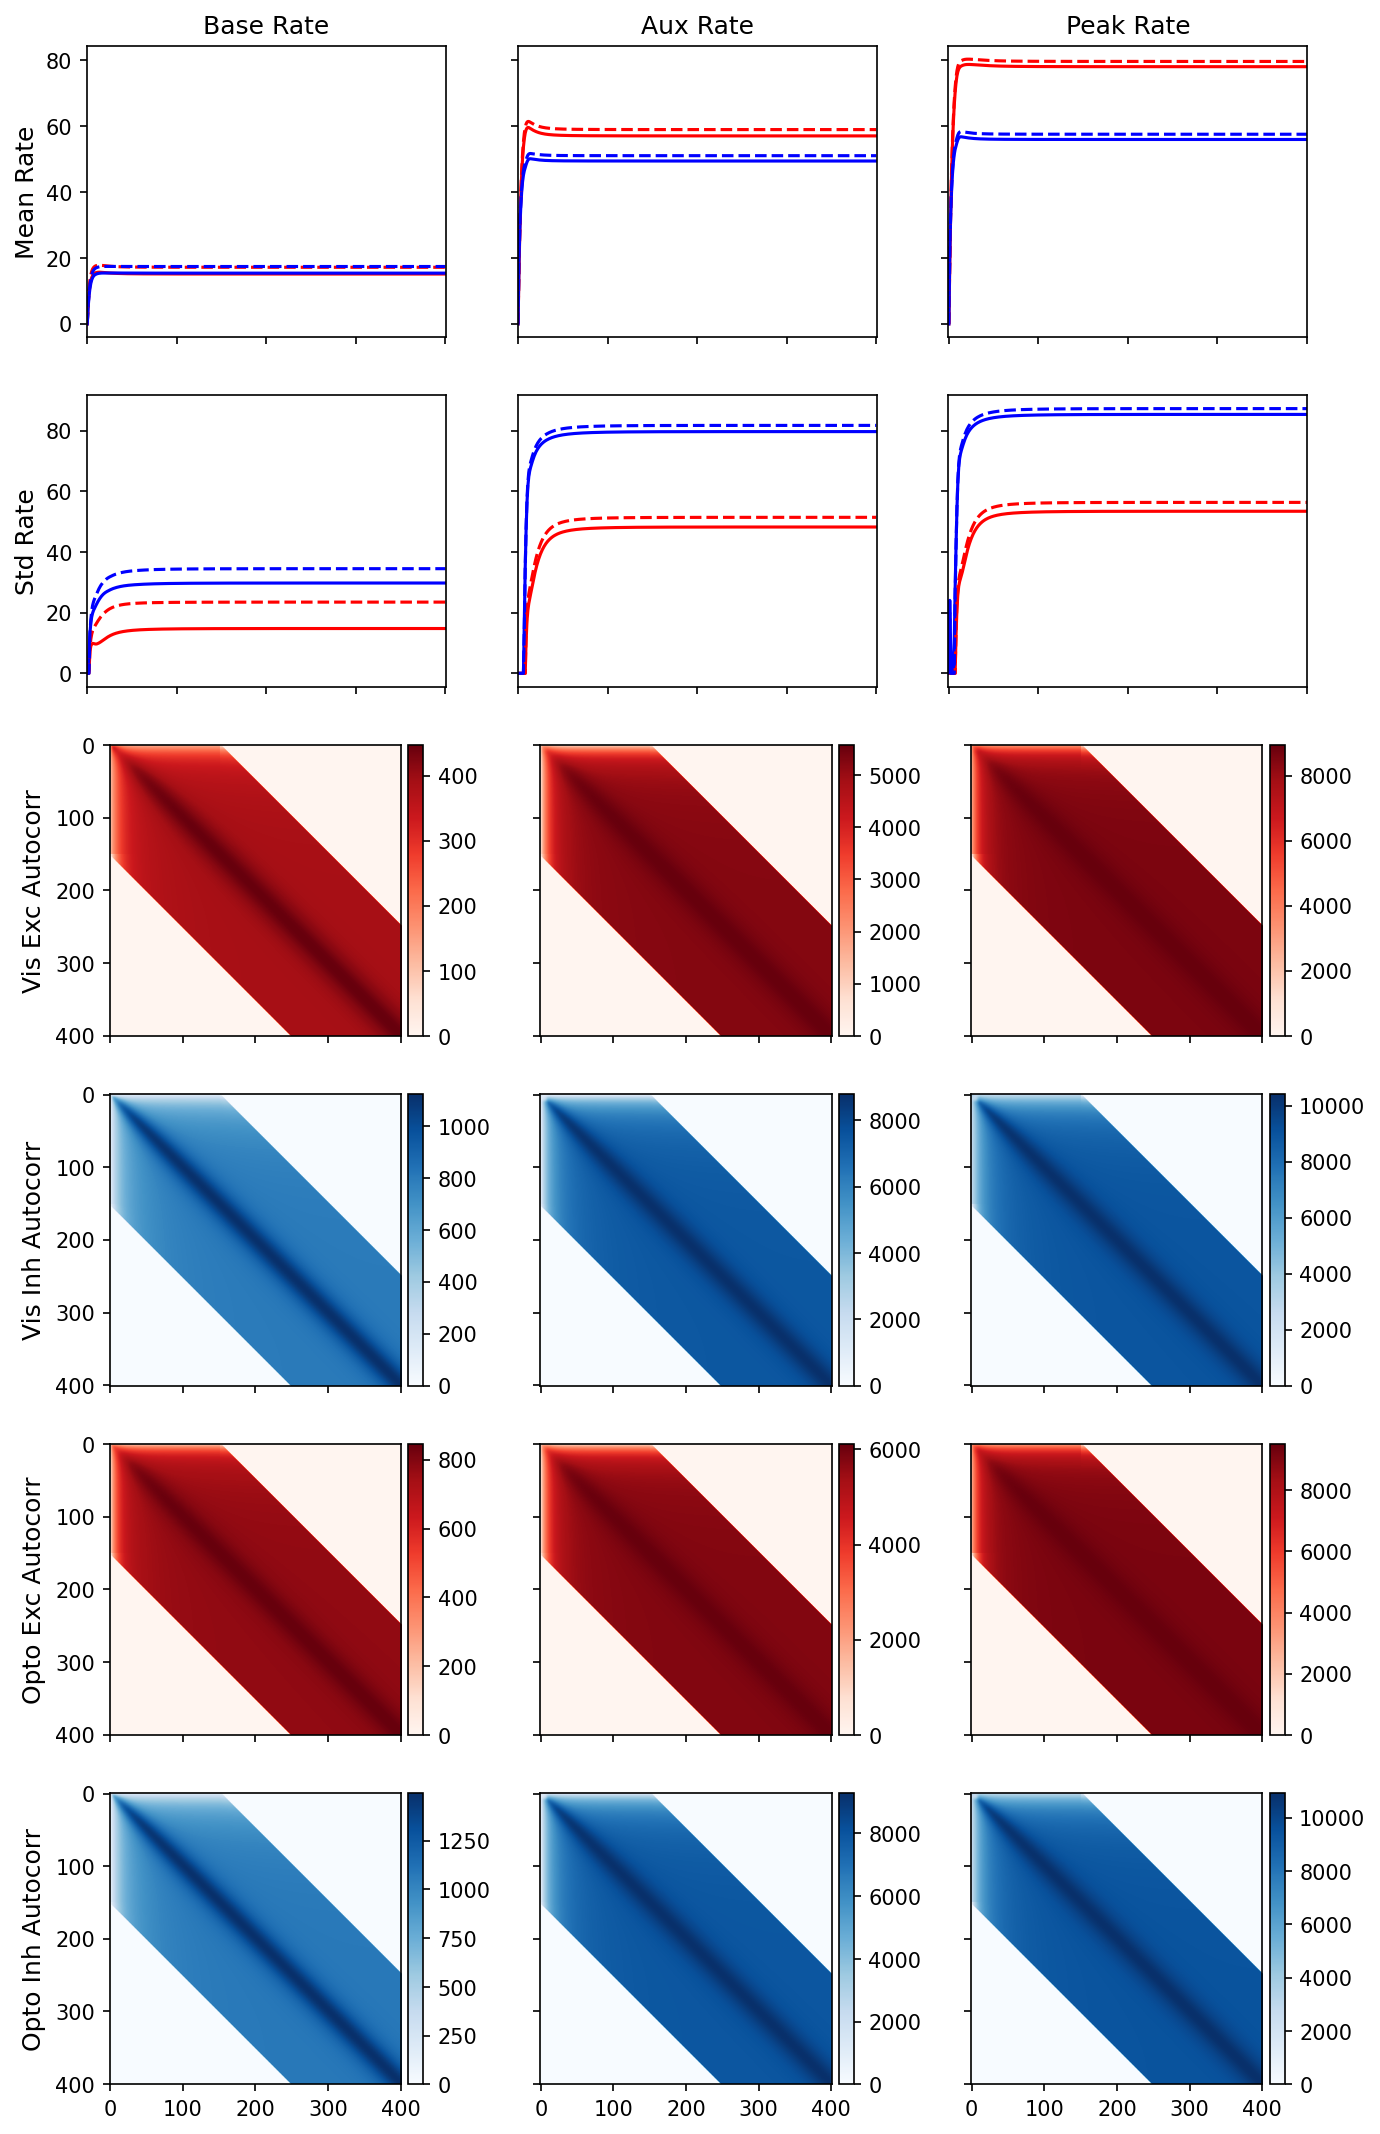

In [13]:
fig,axs = plt.subplots(6,3,figsize=(3.5*3,3*6),dpi=150,sharex=True,sharey='row')

axs[0,0].plot(full_rb[0],'r-')
axs[0,0].plot(full_rb[1],'b-')
axs[0,0].plot(full_rb[2],'r--')
axs[0,0].plot(full_rb[3],'b--')
axs[0,1].plot(full_ra[0],'r-')
axs[0,1].plot(full_ra[1],'b-')
axs[0,1].plot(full_ra[2],'r--')
axs[0,1].plot(full_ra[3],'b--')
axs[0,2].plot(full_rp[0],'r-')
axs[0,2].plot(full_rp[1],'b-')
axs[0,2].plot(full_rp[2],'r--')
axs[0,2].plot(full_rp[3],'b--')

axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[0])-rb[0]**2,0)),'r-')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[1])-rb[1]**2,0)),'b-')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[2])-rb[2]**2,0)),'r--')
axs[1,0].plot(np.sqrt(np.fmax(np.diag(full_Crb[3])-rb[3]**2,0)),'b--')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[0])-ra[0]**2,0)),'r-')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[1])-ra[1]**2,0)),'b-')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[2])-ra[2]**2,0)),'r--')
axs[1,1].plot(np.sqrt(np.fmax(np.diag(full_Cra[3])-ra[3]**2,0)),'b--')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[0])-rp[0]**2,0)),'r-')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[1])-rp[1]**2,0)),'b-')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[2])-rp[2]**2,0)),'r--')
axs[1,2].plot(np.sqrt(np.fmax(np.diag(full_Crp[3])-rp[3]**2,0)),'b--')

imshowbar(fig,axs[2+0,0],full_Crb[0],cmap='Reds')
imshowbar(fig,axs[2+1,0],full_Crb[1],cmap='Blues')
imshowbar(fig,axs[2+2,0],full_Crb[2],cmap='Reds')
imshowbar(fig,axs[2+3,0],full_Crb[3],cmap='Blues')
imshowbar(fig,axs[2+0,1],full_Cra[0],cmap='Reds')
imshowbar(fig,axs[2+1,1],full_Cra[1],cmap='Blues')
imshowbar(fig,axs[2+2,1],full_Cra[2],cmap='Reds')
imshowbar(fig,axs[2+3,1],full_Cra[3],cmap='Blues')
imshowbar(fig,axs[2+0,2],full_Crp[0],cmap='Reds')
imshowbar(fig,axs[2+1,2],full_Crp[1],cmap='Blues')
imshowbar(fig,axs[2+2,2],full_Crp[2],cmap='Reds')
imshowbar(fig,axs[2+3,2],full_Crp[3],cmap='Blues')

axs[0,0].set_title('Base Rate')
axs[0,1].set_title('Aux Rate')
axs[0,2].set_title('Peak Rate')

ytitle(axs[0,0],'Mean Rate',xloc=-0.2,fontsize=12)
ytitle(axs[1,0],'Std Rate',xloc=-0.2,fontsize=12)
ytitle(axs[2+0,0],'Vis Exc Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+1,0],'Vis Inh Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+2,0],'Opto Exc Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[2+3,0],'Opto Inh Autocorr',xloc=-0.3,fontsize=12)

In [10]:
print(rb)
print(ra)
print(rp)
print(grid_stat(np.mean,Crb,1,dt))
print(grid_stat(np.mean,Cra,1,dt))
print(grid_stat(np.mean,Crp,1,dt))
print(sr)
print(grid_stat(np.mean,sCr,1,dt))
print(convb)
print(conva)
print(convp)

[15.133091 15.398537 17.173674 17.412464]
[57.029774 49.412296 58.94782  51.030403]
[78.02709  55.947884 79.6198   57.536846]
[ 395.23740578  837.91704739  782.81015023 1124.22663635]
[5284.373793   7619.53704258 5824.08001675 8088.80039918]
[8604.41703812 9121.81192323 9177.88571553 9616.18620307]
[16.641127 25.300146 16.72819  25.216362]
[14.73328116 23.70740932 14.85203267 23.81634354]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


# Define Second Stage DMFT Functions

In [124]:
sr2π = np.sqrt(2*np.pi)

def R(M1,M2,μ1,μ2,Σ1,Σ2,k):
    c = np.sign(k)*np.fmin(np.abs(k)/np.sqrt(Σ1*Σ2),1)
    σ1 = np.sign(c)*np.sqrt(Σ1*np.abs(c))
    σ2 = np.sqrt(Σ2*np.abs(c))
    Δ1 = Σ1*(1-np.abs(c))
    Δ2 = Σ2*(1-np.abs(c))
    return quad(lambda x: np.exp(-0.5*x**2)/sr2π*\
                M1(μ1+σ1*x,Δ1)*\
                M2(μ2+σ2*x,Δ2),-8,8)[0]

def R_int(M1,M2,μ1,μ2,Σ1,Σ2,k,x):
    c = np.sign(k)*np.fmin(np.abs(k)/np.sqrt(Σ1*Σ2),1)
    σ1 = np.sign(c)*np.sqrt(Σ1*np.abs(c))
    σ2 = np.sqrt(Σ2*np.abs(c))
    Δ1 = Σ1*(1-np.abs(c))
    Δ2 = Σ2*(1-np.abs(c))
    return np.exp(-0.5*x**2)/sr2π*\
                M1(μ1+σ1*x,Δ1)*\
                M2(μ2+σ2*x,Δ2)

def R_simp(M1,M2,μ1,μ2,Σ1,Σ2,k):
    xs = np.linspace(-8,8,1001)
    return simpson(R_int(M1,M2,μ1,μ2,Σ1,Σ2,k,xs),xs)

def diff_R(μ1i,μ2i,Σ1ii,Σ2ii,kij,out):
    out[0] = R_simp(ME,ML,μ1i[0],μ2i[0],Σ1ii[0],Σ2ii[0],kij[0])
    out[1] = R_simp(MI,MI,μ1i[1],μ2i[1],Σ1ii[1],Σ2ii[1],kij[1])

In [94]:
def diff_sparse_dmft(τ,W,K,Hb,Hp,εH,sW,sH,sa,R_fn,Twrm,Tsav,dt,rb,ra,rp,Crb,Cra,Crp,
                     Cdrb0=None,Cdra0=None,Cdrp0=None):
    Ntyp = len(Hb)
    Nint = round((Twrm+Tsav)/dt)+1
    Nclc = round(1.5*Tsav/dt)+1
    Nsav = round(Tsav/dt)+1
    
    Cdrb = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    Cdra = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    Cdrp = np.zeros((Ntyp,Nint,Nint),dtype=np.float32)
    
    if Cdrb0 is None:
        Cdrb0 = (rb[Ntyp:] - rb[:Ntyp]).astype(np.float32)[:,None]**2 + 1e2
    if Cdra0 is None:
        Cdra0 = (ra[Ntyp:] - ra[:Ntyp]).astype(np.float32)[:,None]**2 + 4e2
    if Cdrp0 is None:
        Cdrp0 = (rp[Ntyp:] - rp[:Ntyp]).astype(np.float32)[:,None]**2 + 9e2
        
    τinv = 1/τ
    dtτinv = dt/τ
    dtτinv2 = dtτinv**2
    
    sa2 = sa**2
    sW2 = sW**2
    sH2 = sH**2
        
    μW = τ[:,None]*W*K
    ΣW = τ[:,None]**2*W**2*K
    
    μHb = τ*Hb
    ΣHb = (μHb*εH)**2
    μHa = τ*(Hb+(Hp-Hb)*np.exp(-0.5*sa2/sH2))
    ΣHa = (μHa*εH)**2
    μHp = τ*Hp
    ΣHp = (μHp*εH)**2
    
    doub_μW = doub_mat(μW)
    doub_ΣW = doub_mat(ΣW)
    
    sr2 = 0.5*sa2/np.log(np.fmax(np.abs((rp-rb)/(ra-rb)),1+1e-4))
    sWr2 = doub_mat(sW2)+sr2
    sCr2 = 0.5*sa2/np.log(np.fmax(np.abs((Crp-Crb)/(Cra-Crb)),1+1e-4))
    sWCr2 = doub_mat(sW2)[:,:,None]+sCr2[None,:,:]
    μb = doub_μW@rb + doub_vec(μHb)
    μa = ((1-np.sqrt(sr2/sWr2)*np.exp(-0.5*sa2/sWr2))*doub_μW)@rb +\
        (np.sqrt(sr2/sWr2)*np.exp(-0.5*sa2/sWr2)*doub_μW)@rp + doub_vec(μHa)
    μp = ((1-np.sqrt(sr2/sWr2))*doub_μW)@rb + (np.sqrt(sr2/sWr2)*doub_μW)@rp + doub_vec(μHp)
    Σb = doub_ΣW@Crb + doub_vec(ΣHb)[:,None]
    Σa = each_matmul((1-np.sqrt(sCr2/sWCr2)*np.exp(-0.5*sa2/sWCr2))*doub_ΣW[:,:,None],Crb) +\
        each_matmul(np.sqrt(sCr2/sWCr2)*np.exp(-0.5*sa2/sWCr2)*doub_ΣW[:,:,None],Crp) + doub_vec(ΣHa)[:,None]
    Σp = each_matmul((1-np.sqrt(sCr2/sWCr2))*doub_ΣW[:,:,None],Crb) +\
        each_matmul(np.sqrt(sCr2/sWCr2)*doub_ΣW[:,:,None],Crp) + doub_vec(ΣHp)[:,None]
    
    NCdr0 = Cdrb0.shape[1]
    if Nclc > NCdr0:
        Cdrb[:,0,:NCdr0] = Cdrb0
        Cdrb[:,0,NCdr0:Nclc] = Cdrb0[:,-1:]
        Cdrb[:,:NCdr0,0] = Cdrb0
        Cdrb[:,NCdr0:Nclc,0] = Cdrb0[:,-1:]
        
        Cdra[:,0,:NCdr0] = Cdra0
        Cdra[:,0,NCdr0:Nclc] = Cdra0[:,-1:]
        Cdra[:,:NCdr0,0] = Cdra0
        Cdra[:,NCdr0:Nclc,0] = Cdra0[:,-1:]
        
        Cdrp[:,0,:NCdr0] = Cdrp0
        Cdrp[:,0,NCdr0:Nclc] = Cdrp0[:,-1:]
        Cdrp[:,:NCdr0,0] = Cdrp0
        Cdrp[:,NCdr0:Nclc,0] = Cdrp0[:,-1:]
    else:
        Cdrb[:,0,:Nclc] = Cdrb0[:,:Nclc]
        Cdrb[:,:Nclc,0] = Cdrb0[:,:Nclc]
        
        Cdra[:,0,:Nclc] = Cdra0[:,:Nclc]
        Cdra[:,:Nclc,0] = Cdra0[:,:Nclc]
        
        Cdrp[:,0,:Nclc] = Cdrp0[:,:Nclc]
        Cdrp[:,:Nclc,0] = Cdrp0[:,:Nclc]
        
    Rφb = np.empty((Ntyp),dtype=np.float32)
    Rφa = np.empty((Ntyp),dtype=np.float32)
    Rφp = np.empty((Ntyp),dtype=np.float32)
    
    for i in range(Nint-1):
        if i > Nclc-1:
            Cdrb[:,i+1,i-Nclc] = Cdrb[:,i,i-Nclc]
            Cdra[:,i+1,i-Nclc] = Cdra[:,i,i-Nclc]
            Cdrp[:,i+1,i-Nclc] = Cdrp[:,i,i-Nclc]
            
        for j in range(max(0,i-Nclc),i+1):
            ij_idx = np.fmin(i-j,Nsav-1)
            
            Cdrbij = Cdrb[:,i,j]
            Cdraij = Cdra[:,i,j]
            Cdrpij = Cdrp[:,i,j]
            sCdr2ij = 0.5*sa2/np.log(np.fmax(np.abs((Cdrpij-Cdrbij)/(Cdraij-Cdrbij)),1+1e-4))
            sWCdr2ij = sW2+sCdr2ij
            Σdbij = ΣW@Cdrbij
            Σdaij = ((1-np.sqrt(sCdr2ij/sWCdr2ij)*np.exp(-0.5*sa2/sWCdr2ij))*ΣW)@Cdrbij +\
                (np.sqrt(sCdr2ij/sWCdr2ij)*np.exp(-0.5*sa2/sWCdr2ij)*ΣW)@Cdrpij
            Σdpij = ((1-np.sqrt(sCdr2ij/sWCdr2ij))*ΣW)@Cdrbij + (np.sqrt(sCdr2ij/sWCdr2ij)*ΣW)@Cdrpij
            
            kbij = 0.5*(Σb[:Ntyp,ij_idx]+Σb[Ntyp:,ij_idx]-Σdbij)
            kaij = 0.5*(Σa[:Ntyp,ij_idx]+Σa[Ntyp:,ij_idx]-Σdaij)
            kpij = 0.5*(Σp[:Ntyp,ij_idx]+Σp[Ntyp:,ij_idx]-Σdpij)
            
            R_fn(μb[:Ntyp],μb[Ntyp:],Σb[:Ntyp,0],Σb[Ntyp:,0],kbij,Rφb)
            R_fn(μa[:Ntyp],μa[Ntyp:],Σa[:Ntyp,0],Σa[Ntyp:,0],kaij,Rφa)
            R_fn(μp[:Ntyp],μp[Ntyp:],Σp[:Ntyp,0],Σp[Ntyp:,0],kpij,Rφp)
            
            Cdrb[:,i+1,j+1] = Cdrb[:,i,j+1]+Cdrb[:,i+1,j]-Cdrb[:,i,j] +\
                dtτinv*(-Cdrb[:,i+1,j]-Cdrb[:,i,j+1]+2*Cdrb[:,i,j]) +\
                dtτinv2*(-Cdrb[:,i,j]+Crb[:Ntyp,ij_idx]+Crb[Ntyp:,ij_idx]-2*Rφb)
            Cdra[:,i+1,j+1] = Cdra[:,i,j+1]+Cdra[:,i+1,j]-Cdra[:,i,j] +\
                dtτinv*(-Cdra[:,i+1,j]-Cdra[:,i,j+1]+2*Cdra[:,i,j]) +\
                dtτinv2*(-Cdra[:,i,j]+Cra[:Ntyp,ij_idx]+Cra[Ntyp:,ij_idx]-2*Rφa)
            Cdrp[:,i+1,j+1] = Cdrp[:,i,j+1]+Cdrp[:,i+1,j]-Cdrp[:,i,j] +\
                dtτinv*(-Cdrp[:,i+1,j]-Cdrp[:,i,j+1]+2*Cdrp[:,i,j]) +\
                dtτinv2*(-Cdrp[:,i,j]+Crp[:Ntyp,ij_idx]+Crp[Ntyp:,ij_idx]-2*Rφp)
            
            if np.any(np.abs(Cdrb[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Cdrb[:,i+1,j+1])):
                print("system diverged when integrating Cdrb")
                return Cdrb,Cdra,Cdrp,False,False,False
            if np.any(np.abs(Cdra[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Cdra[:,i+1,j+1])):
                print("system diverged when integrating Cdra")
                return Cdrb,Cdra,Cdrp,False,False,False
            if np.any(np.abs(Cdrp[:,i+1,j+1]) > 1e10) or np.any(np.isnan(Cdrp[:,i+1,j+1])):
                print("system diverged when integrating Cdrp")
                return Cdrb,Cdra,Cdrp,False,False,False
                
            Cdrb[:,j+1,i+1] = Cdrb[:,i+1,j+1]
            Cdra[:,j+1,i+1] = Cdra[:,i+1,j+1]
            Cdrp[:,j+1,i+1] = Cdrp[:,i+1,j+1]
            
        Ndiv = 20
        if (Ndiv*(i+1)) % (Nint-1) == 0:
            print("{:.2f}% completed".format((i+1)/(Nint-1)))
            
    Cdrb_diag = each_diag(Cdrb)
    Cdra_diag = each_diag(Cdra)
    Cdrp_diag = each_diag(Cdrp)
    
    return Cdrb,Cdra,Cdrp,\
        (np.max(Cdrb_diag[:,-Nsav:],axis=1)-np.min(Cdrb_diag[:,-Nsav:],axis=1))/\
            np.mean(Cdrb_diag[:,-Nsav:],axis=1) < 1e-3,\
        (np.max(Cdra_diag[:,-Nsav:],axis=1)-np.min(Cdra_diag[:,-Nsav:],axis=1))/\
            np.mean(Cdra_diag[:,-Nsav:],axis=1) < 1e-3,\
        (np.max(Cdrp_diag[:,-Nsav:],axis=1)-np.min(Cdrp_diag[:,-Nsav:],axis=1))/\
            np.mean(Cdrp_diag[:,-Nsav:],axis=1) < 1e-3

In [132]:
start = time.process_time()

full_Cdrb,full_Cdra,full_Cdrp,\
    convdb,convda,convdp = diff_sparse_dmft(τ,W,Ks,Hb,Hp,εH,sW,sH,sa,diff_R,Twrm,Tsav,dt,
                                            rb,ra,rp,Crb,Cra,Crp)

print(time.process_time() - start)

drb = rb[:2] - rb[2:]
dra = ra[:2] - ra[2:]
drp = rp[:2] - rp[2:]
Cdrb = full_Cdrb[:,-1,-1:-Nsav-1:-1]
Cdra = full_Cdra[:,-1,-1:-Nsav-1:-1]
Cdrp = full_Cdrp[:,-1,-1:-Nsav-1:-1]

sCdr2 = 0.5*sa2/np.log(np.fmax(np.abs((Cdrp-Cdrb)/(Cdra-Cdrb)),1+1e-4))

sCdr = np.sqrt(sCdr2)

0.05% completed
0.10% completed
0.15% completed
0.20% completed
0.25% completed
0.30% completed
0.35% completed
0.40% completed
0.45% completed
0.50% completed
0.55% completed
0.60% completed
0.65% completed
0.70% completed
0.75% completed
0.80% completed
0.85% completed
0.90% completed
0.95% completed
1.00% completed
1353.8218250000064


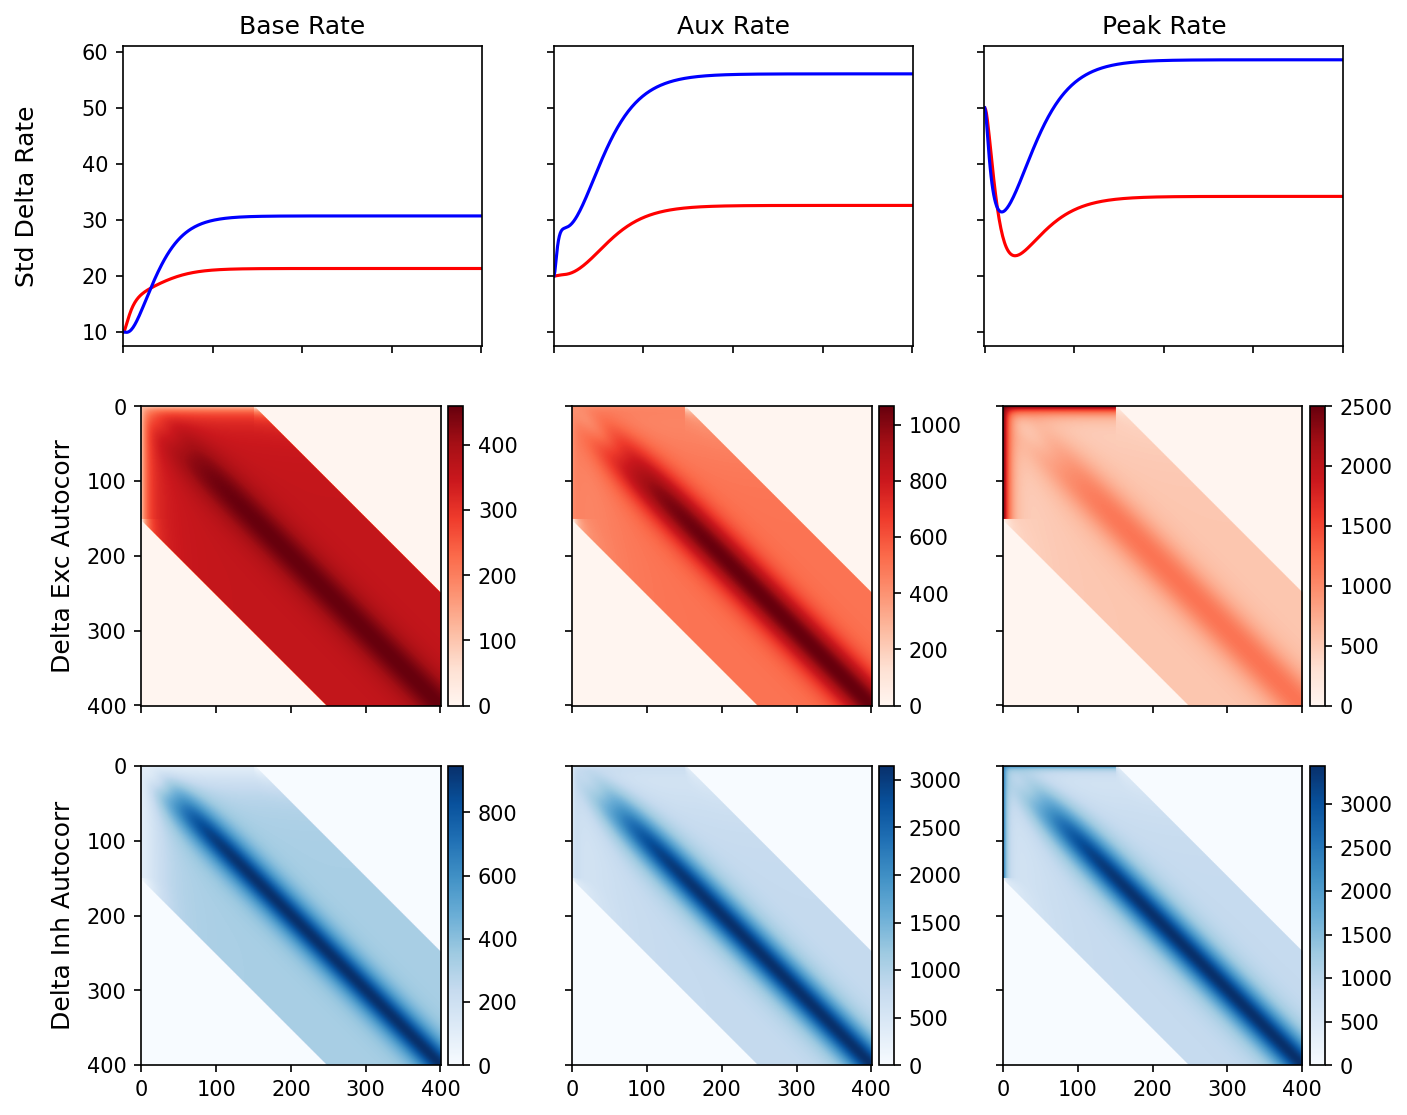

In [144]:
fig,axs = plt.subplots(3,3,figsize=(3.5*3,3*3),dpi=150,sharex=True,sharey='row')

axs[0,0].plot(np.sqrt(np.fmax(np.diag(full_Cdrb[0])-drb[0]**2,0)),'r-')
axs[0,0].plot(np.sqrt(np.fmax(np.diag(full_Cdrb[1])-drb[1]**2,0)),'b-')
axs[0,1].plot(np.sqrt(np.fmax(np.diag(full_Cdra[0])-dra[0]**2,0)),'r-')
axs[0,1].plot(np.sqrt(np.fmax(np.diag(full_Cdra[1])-dra[1]**2,0)),'b-')
axs[0,2].plot(np.sqrt(np.fmax(np.diag(full_Cdrp[0])-drp[0]**2,0)),'r-')
axs[0,2].plot(np.sqrt(np.fmax(np.diag(full_Cdrp[1])-drp[1]**2,0)),'b-')

imshowbar(fig,axs[1+0,0],full_Cdrb[0],cmap='Reds')
imshowbar(fig,axs[1+1,0],full_Cdrb[1],cmap='Blues')
imshowbar(fig,axs[1+0,1],full_Cdra[0],cmap='Reds')
imshowbar(fig,axs[1+1,1],full_Cdra[1],cmap='Blues')
imshowbar(fig,axs[1+0,2],full_Cdrp[0],cmap='Reds')
imshowbar(fig,axs[1+1,2],full_Cdrp[1],cmap='Blues')

axs[0,0].set_title('Base Rate')
axs[0,1].set_title('Aux Rate')
axs[0,2].set_title('Peak Rate')

ytitle(axs[0,0],'Std Delta Rate',xloc=-0.3,fontsize=12)
ytitle(axs[1+0,0],'Delta Exc Autocorr',xloc=-0.3,fontsize=12)
ytitle(axs[1+1,0],'Delta Inh Autocorr',xloc=-0.3,fontsize=12)

In [134]:
print(drb)
print(dra)
print(drp)
print(grid_stat(np.mean,Cdrb[:,:],1,dt))
print(grid_stat(np.mean,Cdra[:,:],1,dt))
print(grid_stat(np.mean,Cdrp[:,:],1,dt))
print(grid_stat(np.mean,sCdr[:,:],1,dt))
print(convdb)
print(convda)
print(convdp)

[-2.0405827 -2.0139275]
[-1.918045  -1.6181068]
[-1.5927048 -1.5889626]
[373.13646655 407.32434429]
[ 602.61482412 1136.68835816]
[ 645.72995098 1235.55566402]
[25.34219748 29.59130058]
[ True  True]
[ True  True]
[ True  True]


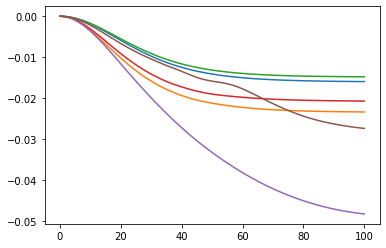

In [143]:
plt.plot((sCr/sCr[:,0:1]-1).T)
plt.plot((sCdr/sCdr[:,0:1]-1).T)

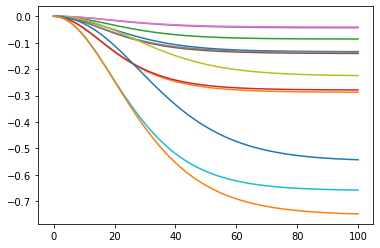

In [145]:
plt.plot((Crb/Crb[:,0:1]-1).T)
plt.plot((Crp/Crp[:,0:1]-1).T)
plt.plot((Cdrb/Cdrb[:,0:1]-1).T)
plt.plot((Cdrp/Cdrp[:,0:1]-1).T)